# DATASCI 347: Machine Learning (Fall 2025)
## Instructor: Alexander Williams Tolbert
# Lecture: Multiple Regression

## Upload Dataset to Google Colab

Since we are working in Google Colab, we must first upload the dataset file (`car_04_regular.csv`).
Run the following cell and choose the file from your local computer.

In [1]:
from google.colab import files  # import Colab's file upload tool
uploaded = files.upload()  # open a file chooser to upload local files

# After uploading, the dataset can be read normally with pandas:
# data1 = pd.read_csv("car_04_regular.csv")

Saving car_04_regular.csv to car_04_regular.csv


When this cell is executed, Colab will open a dialog box for selecting files from your computer.
After upload, the file is stored in Colab's working directory, and it can be loaded using `pd.read_csv("car_04_regular.csv")`.

## Objectives

Data Science is a field of science. We try to extract useful information from data. In order to use the data efficiently and correctly we must understand the data first. According to the goal of the study, combining the domain knowledge, we then design the study. In this lecture we first go through some basic exploratory data analysis to understand the nature of the data, some plausible relationship among the variables.

Data mining tools have been expanded dramatically in the past 20 years. Linear model as a building block for data science is simple and powerful. We introduce/review linear models. The focus is to understand what is it we are modeling; how to apply the data to get the information; to understand the intrinsic variability that statistics have.

**Suggested reading:**
- This lecture in details
- Chapter 3 of ISLR
- Stat Sleuth: Ch 7-10 Multiple Reg, Ch 5: One Way ANOVA

Note: Many important topics are in Appendices. Please go through them.

**Data needed:** car_04_regular.csv and Cars_04.csv

### Elements to multiple regression
- Model specification
- General linear models
- LS estimates and their properties
- Inference for the coefficients for the mean response and for a future response
- Categorical predictors
- Adding categorical predictors to the multiple regression (ANOVA)
- Model with both continuous and categorical variables (ANCOVA)
- Models with or without interactions

### More about multiple Regression
- Sandwich standard error estimates to handle heteroscedasticity vs. homoscedasticity
- Modeling non-linear relationships
- Transformation of variables to meet linear model assumptions
- Outliers, Leverage points
- Summary

### Appendices
- Python functions: statsmodels OLS, anova, sklearn
- stargazer equivalent for organizing tables
- sandwich covariance estimators

## 1. Case Study: Fuel Efficiency in Automobiles

When an automobile manufacturer designs a new car, what is the benchmark to compare with in terms of fuel efficiency? How well can we predict housing price based on the house characteristics? Multiple regression is an extension of simple regression. It explores relationship between one variable (response) with many other variables (predictors or features). We highlight the regression methods in this lecture. It is important to understand the effect of each predictor on the response depending on what else are included in the model. Our approach here unifies usual multiple regression and ANOVA.

**Goal of the study:** How to build a fuel efficient car?

- Effects of features on a car
- Given a set of features, we'd like to estimate the mean fuel efficiency as well as the efficiency of one car
- Are Asian cars more efficient than cars built in other regions?

We will use the car_04_regular.csv data set to perform a case study on fuel efficiency of automobiles. Below is a quick description of all the features in our dataset.

| Feature | Description |
|---------|------------|
| Continent | Continent the Car Company is From |
| Horsepower | Horsepower of the Vehicle |
| Weight | Weight of the vehicle (thousand lb) |
| Length | Length of the Vehicle (inches) |
| Width | Width of the Vehicle (inches) |
| Seating | Number of Seats in the Vehicle |
| Cylinders | Number of Engine Cylinders |
| Displacement | Volume displaced by the cylinders, defined as π/4 × bore² × stroke × Number of Cylinders |
| Transmission | Type of Transmission (manual, automatic, continuous) |

Once we know the data structure we will rephrase our goal of study. Specifically, fuel efficiency is measured by Mileage per Gallon, $Y$ = MPG_City

**Predictors:** Effects of each feature on $Y$

**Estimate** - the mean MPG_City for all such cars specified below and - predict $Y$ for the particular car described below

Are cars built by Asian more efficient?

In particularly, we would like to investigate the MPG_City for this newly designed American car:

| Feature | Value |
|---------|-------|
| Continent | America |
| Horsepower | 225 |
| Weight | 4 |
| Length | 180 |
| Width | 80 |
| Seating | 5 |
| Cylinders | 4 |
| Displacement | 3.5 |
| Transmission | automatic |

### 1.1 Exploratory Data Analysis

It is always crucial to look at the data first. For the purpose of shortening the lecture time, we put this part in Appendix 1 which explains how we cleaned the original data Car_04.csv and created a new version called car_04_regular.csv.

To summarize the EDA quickly, we excluded some high-performance cars with large Horsepower (HP > 400). We also take a subset of features, containing only the features described in the description table.

### 1.2 A quick glimpse

Let's load the necessary libraries and explore our dataset:

In [2]:
import pandas as pd  # pandas library for data manipulation
import numpy as np  # numpy for numerical operations
import matplotlib.pyplot as plt  # matplotlib for plotting
import seaborn as sns  # seaborn for statistical visualizations
import statsmodels.api as sm  # statsmodels for statistical models
import statsmodels.formula.api as smf  # formula API for regression
from statsmodels.stats.sandwich_covariance import cov_hc1  # heteroskedasticity-consistent covariance
from scipy import stats  # scipy for statistical functions
import warnings  # to suppress warnings
warnings.filterwarnings('ignore')  # ignore warning messages

This code imports all the essential Python libraries we'll need for our multiple regression analysis. The `pandas` library gives us DataFrames to work with tabular data. The `numpy` library provides numerical array operations. The `matplotlib.pyplot` and `seaborn` libraries create visualizations. The `statsmodels` package provides regression models and statistical tests. The `scipy.stats` module offers statistical distributions and functions. Finally, we suppress warnings to keep our output clean.

Now let's load and examine our dataset:

In [3]:
data1 = pd.read_csv("car_04_regular.csv")  # read CSV file into DataFrame

print(data1.columns.tolist())  # print list of all column names

['Make.Model', 'Continent', 'MPG_City', 'MPG_Hwy', 'Horsepower', 'Weight', 'Length', 'Width', 'Seating', 'Cylinders', 'Displacement', 'Make', 'Transmission']


The `pd.read_csv()` function reads the CSV file and creates a DataFrame object called `data1`. The DataFrame is like a spreadsheet in memory - it has rows (observations) and columns (variables). The `.columns.tolist()` method extracts all column names from the DataFrame and converts them to a Python list, which we then print to see all available variables.

Let's check the dimensions and structure of our data:

In [4]:
print(f"Dimensions: {data1.shape}")  # print number of rows and columns using f-string formatting
print(f"226 cars and {len(data1.columns)} variables")  # count columns using len() function

Dimensions: (226, 13)
226 cars and 13 variables


The `.shape` attribute returns a tuple containing (number_of_rows, number_of_columns). The f-string syntax `f"..."` allows us to embed Python expressions inside strings by wrapping them in curly braces `{}`. The `len()` function counts the number of items in the columns list.

Now let's examine the data types and structure:

In [5]:
print(data1.info())  # display DataFrame information including data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make.Model    226 non-null    object 
 1   Continent     226 non-null    object 
 2   MPG_City      226 non-null    int64  
 3   MPG_Hwy       226 non-null    int64  
 4   Horsepower    226 non-null    int64  
 5   Weight        226 non-null    float64
 6   Length        226 non-null    float64
 7   Width         226 non-null    float64
 8   Seating       226 non-null    int64  
 9   Cylinders     226 non-null    int64  
 10  Displacement  226 non-null    float64
 11  Make          226 non-null    object 
 12  Transmission  226 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 23.1+ KB
None


The `.info()` method provides a concise summary of the DataFrame, showing the column names, the number of non-null values in each column, and the data type of each column (like int64 for integers, float64 for decimals, and object for text).

Let's view the first few rows of our data:

In [6]:
print(data1.head())  # display first 5 rows of DataFrame

  Make.Model Continent  MPG_City  MPG_Hwy  Horsepower  Weight  Length  Width  \
0   Acura_RL        As        18       24         225   3.898   196.6   71.6   
1   Acura_TL        As        20       28         270   3.575   189.3   72.2   
2  Acura_TSX        As        23       32         200   3.318   183.3   69.4   
3  Acura_RSX        As        25       34         160   2.771   172.2   67.9   
4  Acura_NSX        As        17       24         252   3.197   174.2   71.3   

   Seating  Cylinders  Displacement   Make Transmission  
0        5          6           3.5  Acura    automatic  
1        5          6           3.2  Acura    automatic  
2        5          4           2.4  Acura    automatic  
3        4          4           2.0  Acura    automatic  
4        2          6           3.0  Acura    automatic  


The `.head()` method returns the first 5 rows by default, giving us a quick preview of the actual data values. This helps us understand what the data looks like before we begin our analysis.

Now we'll create a new car for prediction later:

In [7]:
newcar = data1.iloc[[0]].copy()  # copy first row using integer location indexing
newcar.iloc[0, 0] = "NA"  # assign value to first column using iloc[row_index, column_index]
newcar.iloc[0, 1] = "Am"  # assign Continent value
newcar["MPG_City"] = "NA"  # assign using column name indexing with square brackets
newcar["MPG_Hwy"] = "NA"  # assign highway MPG
newcar.iloc[0, 4:10] = [225, 4, 180, 80, 5, 4]  # assign multiple values using slice 4:10
newcar["Displacement"] = 3.5  # assign displacement value
newcar["Make"] = "NA"  # assign make
newcar.iloc[0, 12] = "automatic"  # assign transmission using position
print(newcar)  # display the new car

  Make.Model Continent MPG_City MPG_Hwy  Horsepower  Weight  Length  Width  \
0         NA        Am       NA      NA         225     4.0   180.0   80.0   

   Seating  Cylinders  Displacement Make Transmission  
0        5          4           3.5   NA    automatic  


This code creates a hypothetical new car for prediction. The `.iloc[]` method accesses DataFrame elements by integer position. The notation `[[0]]` with double brackets selects row 0 as a DataFrame (not a Series). The `.copy()` method creates an independent copy so changes don't affect the original data. We can assign values using either `.iloc[row, column]` for positional indexing or `["column_name"]` for label-based indexing. The slice notation `4:10` selects columns from position 4 up to (but not including) position 10.

## 2. Introduction to Multiple Regression

### 2.1 Model Specification

How does Length affect MPG_City?

It depends on how we model the response. We will investigate three models with Length.

For the ease of presentation, we define some predictors below that we will use in subsequent models:

$x_1 = Length, x_2 = Horsepower, x_3 = Width, x_4 = Seating, x_5 = Cylinders, x_6 = Displacement$

We will create three models:

**M1.** Our first model will only contain one predictor, Length:

$y_i = \beta_0 + \beta_1 \cdot x_{i1} + \epsilon$

Interpretation of $\beta_1$ is that in general, the mean $y$ will change by $\beta_1$ if a car is 1" longer. So we can't really peel off the effect of the Length over $y$.

**M2.** Next, we add the predictor Horsepower to our model

$y_i = \beta_0 + \beta_1 \cdot x_{i1} + \beta_2 \cdot x_{i2} + \epsilon$

Interpretation of $\beta_1$ is that in general, the mean $y$ will change by $\beta_1$ if a car is 1" longer and the Horsepowers are the same.

**M3.** Finally, we fit a model with multiple predictors

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_4 x_{i4} + \beta_5 x_{i5} + \beta_6 x_{i6} + \epsilon$

Interpretation of $\beta_1$ is that in general, the mean $y$ will change by $\beta_1$ if a car is 1" longer and the rest of the features are the same.

**Question:** Are all the $\beta_1$s same in the 3 models above?

No. The effect of Length $\beta_1$ depends on the rest of the features in the model!

### 2.2 General Linear Models

In general, we define a multiple regression as

$Y = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \epsilon_i$

**Linearity Assumption** for this model is
$\mathbf{E}(y_i|x_i) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}$

The **homoscedasticity assumption** is
$\mathbf{Var}(y_i|x_{i1}, x_{i2}, \ldots, x_{ip}) = \sigma^2$

The **Error term** is i.i.d. and defined as
$\epsilon_i \sim iid(0, \sigma^2)$

This is same to say the errors are independent and with a normal distribution of mean 0 and an equal variance $\sigma^2$.

Parameters of interests are all the $\beta$'s and $\sigma^2$.

- Simple interpretations of each $\beta_i$'s
- Simple models for predictions

### 2.3 OLS and its Properties

These $\beta$ parameters are estimated using the same approach as simple regression, specifically by minimizing the sum of squared residuals (RSS):

$\min_{\beta_0, \beta_1, \beta_2, \ldots, \beta_p} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_{i1} - \beta_2 x_{i2} - \cdots - \beta_p x_{ip})^2$

To be specific:

We define let $X$ denote a $n \times (p+1)$ matrix whose $(i,j)$th element is $x_{ij}$. That is:

$X = \begin{pmatrix} 1 & x_{11} & x_{12} & \cdots & x_{1p} \\ 1 & x_{21} & x_{22} & \cdots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \cdots & x_{np} \end{pmatrix}$

#### 2.3.1 OLS Estimates

**Mathematical formula for the OLS estimates:**

The least squared estimators can be obtained precisely by
$\hat{\beta} = (X^T X)^{-1} X^T Y$

**Variance of the OLS:**

The variance-covariance matrix of $\hat{\beta}$

$\mathbf{V}[\hat{\beta}|X] = \sigma^2(X^T X)^{-1}$

**Remark:**

The above covariance matrix is obtained with a homoscedastic variance of $y$'s.

**Normality of the OLS:**

Under all the linear model assumptions, the LSE's are unbiased estimators of $\beta$ and they are normally distributed.
$\hat{\beta}|X \sim N(0, \sigma^2(X^T X)^{-1})$

**Standard errors**

As soon as we know how to estimate common $\sigma^2$, we can estimate $\mathbf{V}[\hat{\beta}|X]$ by $\hat{\mathbf{V}}[\hat{\beta}|X] = \hat{\sigma}^2(X^T X)^{-1}$. The standard error for each $\hat{\beta}_i$ will be
$se(\hat{\beta}_i) = \sqrt{\hat{\sigma}^2(X^T X)^{-1}|_{ith Diag}}$

**Confidence intervals each $\beta_i$:**

A 95% t-interval for $\beta_i$ is
$\hat{\beta}_i \pm t^*_{.025} se(\hat{\beta}_i)$.

Here $t^*_{.025}$ is the upper .025 percentile from a t distribution. You may take it to be approximately 1.96 if we have have a large number of observations $n$.

$se(\hat{\beta}_i)$ is taken from the variance formula above.

It is a t-confidence interval because we need to estimate the unknown $\sigma^2$.

**Hypothesis test for each $\beta_i$:**

To test that
$\beta_i = 0$ vs. $\beta_i \neq 0$

which means that given other variables in the model, there is no $x_i$ effect. We carry out a t-test:

$tstat = \frac{\hat{\beta}_i - 0}{se(\hat{\beta}_i)}$

The p-value is:
$p\text{-value} = 2 \times P(T \text{ variable} > tstat)$.

We reject the null hypothesis at an $\alpha$ level if the p-value is < $\alpha$.

**A 95% Confidence interval for the mean given a set of predictors:**

$\hat{y} \pm t^*_{.025} \times se(\hat{y})$

**A 95% prediction interval for a future $y$ given a set of predictors:**
$\hat{y} \pm t^*_{.025} \times \hat{\sigma}$.

#### 2.3.2 Residual Sum of Squares (RSS)

For multiple regression, RSS is estimated as:

$RSS = \sum_{i=1}^n \hat{\epsilon}_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}))^2$

#### 2.3.3 Mean Sum of Squares (MSE), Residual Standard Error (RSE)

$\sigma^2$ is estimated by the Mean Sum of Squares (MSE). For multiple regression, MSE is defined as:

$MSE = \frac{RSS}{n-p-1}$ where $p$ = number of predictors

$\sigma$ is estimated by the Residual Standard Error (RSE). For multiple regression, RSE is defined as:

$\hat{\sigma} = RSE = \sqrt{MSE} = \sqrt{\frac{RSS}{n-p-1}}$

**Remark:**

Notice the denominator in MSE is $n-(p+1)$, where $p+1$ is the number of predictors in the model +1. By doing so we have a nice mathematical property: RSE is an unbiased estimator of $\sigma^2$. In another word, in a long run, on average the estimator hits the quantity being estimated.

#### 2.3.4 Goodness of Fit: $R^2$

**Total Sum of Squares (TSS):**

TSS measures the total variance in the response $Y$. When all the responses are the same which means no predictors affect the response values, then $TSS = 0$. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression.

$TSS = \sum_{i=1}^n (y_i - \bar{y})^2$

**$R^2$:**

How much variability is captured in the linear model using this set of predictors? $R^2$ measures the proportion of variability in $Y$ that can be explained using this set of predictors in the model.

$R^2 = \frac{TSS - RSS}{TSS}$

**Remark 1:**

$TSS \geq RSS$. Why so? $R^2 \leq 1$. $TSS = RSS + \sum(\hat{y}_i - \bar{y})^2$. $(corr(y, \hat{y}))^2$

An $R^2$ statistic that is close to 1 indicates that a large proportion of the variability in the response has been explained by the regression.

**Remark 2:**

How large $R^2$ needs to be so that you are comfortable to use the linear model? Though $R^2$ is a very popular notion of goodness of fit, but it has its limitation. Mainly all the sum of squared errors defined so far are termed as Training Errors. It really only measures how good a model fits the data that we use to build the model. It may not generalize well to unseen data.

### 2.4 Python function for linear regression

Linear models are so popular due to their nice interpretations as well as clean solutions. The statsmodels library provides comprehensive regression functionality. It takes a model specification together with other options, outputs all the estimators, summary statistics such as various sum of squares, standard errors of estimators, testing statistics and p-values. Finally the predicted values with margin of errors or confidence intervals and prediction intervals can be called.

### 2.5 Compare Three Models

Linear model effects or coefficients are defined within the model, they depend on the rest of the variables in the model. Let us compare the three model fits, focusing on the interpretations over the coefficients of length in different models.

#### 2.5.1 Model 1: MPG_City ~ Length

We first do a simple regression. Let the response $y_i$ be the MPG_City and the explanatory variable $x_{i1}$ be Length ($i=1,\ldots,n=226$).

$y_i = \beta_0 + \beta_1 \cdot x_{i1} + \epsilon$

Model assumptions:

- Linearity: given Length, the mean of MPG_City is described as $\mathbf{E}(y_i|x_i) = \beta_0 + \beta_1 x_i$
- Equal variance: the variances of MPG_City are the same for any Length i.e. $\mathbf{Var}(y_i|x_{i1}) = \sigma_1^2$
- Normality: MPG_City is independent and normally distributed. i.e. $\epsilon_i \sim iid(0, \sigma_1^2)$

We now create a model with statsmodels:

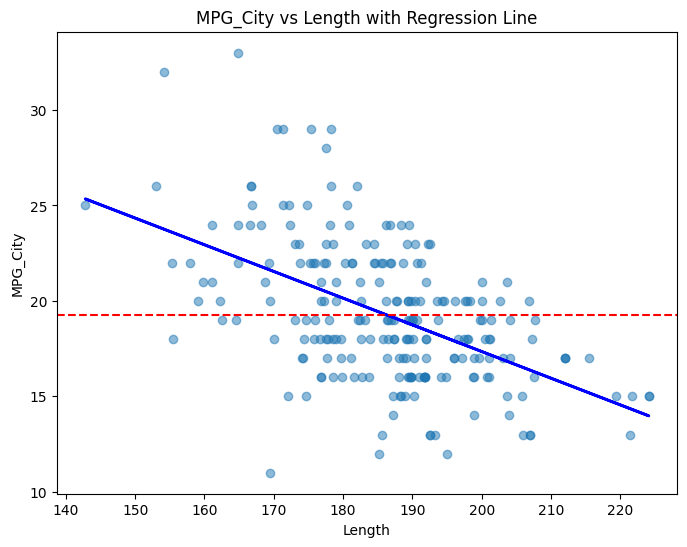

In [8]:
fit1 = smf.ols('MPG_City ~ Length', data=data1).fit()  # create OLS model using formula API and fit it

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))  # set figure size to 8 inches wide, 6 inches tall
plt.scatter(data1['Length'], data1['MPG_City'], alpha=0.5)  # scatter plot with transparency=0.5
plt.plot(data1['Length'], fit1.predict(), color='blue', linewidth=2)  # regression line
plt.axhline(y=data1['MPG_City'].mean(), color='red', linestyle='--')  # horizontal line at mean
plt.xlabel('Length')  # x-axis label
plt.ylabel('MPG_City')  # y-axis label
plt.title('MPG_City vs Length with Regression Line')  # plot title
plt.show()  # display the plot

The `smf.ols()` function creates an Ordinary Least Squares regression model using the formula syntax. The formula `'MPG_City ~ Length'` specifies that MPG_City is the dependent variable (left of ~) and Length is the independent variable (right of ~). The `.fit()` method estimates the model parameters.

For visualization, `plt.figure()` creates a new figure with specified dimensions. The `plt.scatter()` function creates a scatter plot where each point represents one car. The `alpha=0.5` parameter makes points semi-transparent. The `fit1.predict()` method generates predicted values for the regression line, which we plot with `plt.plot()`. The `plt.axhline()` function adds a horizontal reference line at the mean MPG_City value. Finally, `plt.show()` renders the plot.

Let's examine the model summary:

In [9]:
print(fit1.summary())  # print comprehensive model summary

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     81.19
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           9.20e-17
Time:                        15:45:09   Log-Likelihood:                -580.79
No. Observations:                 226   AIC:                             1166.
Df Residuals:                     224   BIC:                             1172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.3138      2.898     15.639      0.0

The `.summary()` method provides a detailed output including coefficient estimates, standard errors, t-statistics, p-values, R-squared, and diagnostic statistics. Note from the summary, the $\hat{\beta}$ for Length is estimated as approximately -0.14. We say on average MPG drops 0.14 if a car is 1 inch longer.

#### 2.5.2 Model 2: MPG_City ~ Length + Horsepower

Let the response $y_i$ be the MPG_City and the explanatory variables be Length and Horsepower ($i=1,\ldots,n=226$).

$y_i = \beta_0 + \beta_1 \cdot x_{i1} + \beta_2 \cdot x_{i2} + \epsilon$

In [10]:
fit2 = smf.ols('MPG_City ~ Length + Horsepower', data=data1).fit()  # multiple regression with + operator
print(fit2.summary())  # display model summary

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.07e-44
Time:                        15:45:40   Log-Likelihood:                -514.71
No. Observations:                 226   AIC:                             1035.
Df Residuals:                     223   BIC:                             1046.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6259      2.225     17.358      0.0

The formula `'MPG_City ~ Length + Horsepower'` specifies a multiple regression model. The plus sign `+` adds Horsepower as an additional predictor. The model now estimates three parameters: the intercept $\beta_0$, the coefficient for Length $\beta_1$, and the coefficient for Horsepower $\beta_2$.

A couple quick notes:
- The order for predictors plays no role
- The output structure is similar regardless how many predictors are used
- The model assumptions extend automatically here

**NOTICE:** Comparing fit2 (Length + Horsepower) to fit1 (Length only):
- The coefficient for Length changed to approximately -0.062 from -0.140!
- $R^2$ increased to 0.591 from 0.266 - a huge increase (never decreasing, why?)
- RSE (Residual standard error) decreased to 2.38 from 3.18 (almost never decreasing, why?)

The effects of variables ($\beta$'s) are defined within the model. They all depend on what else are included or accounted for!

#### 2.5.3 Model 3: Several continuous variables

We now add multiple variables to our model:

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_4 x_{i4} + \beta_5 x_{i5} + \beta_6 x_{i6} + \epsilon$

In [11]:
fit3 = smf.ols('MPG_City ~ Length + Horsepower + Width + Seating + Cylinders + Displacement',
               data=data1).fit()  # model with 6 predictors
print(fit3.summary())  # print full regression results

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     87.22
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.74e-55
Time:                        15:46:04   Log-Likelihood:                -477.80
No. Observations:                 226   AIC:                             969.6
Df Residuals:                     219   BIC:                             993.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.6337      4.028     11.329   

This formula includes six predictors separated by `+` signs. Each predictor gets its own coefficient in the model. The statsmodels library automatically adds an intercept term unless explicitly excluded.

Based on the output from model 3:
- $\hat{\beta}_{Length}$ = 0.049 for model 3. Is this estimate wrong?

To summarize, the effects of Length from the above three models are:

In [12]:
# Create comparison DataFrame
comparison = pd.DataFrame({  # create DataFrame using dictionary
    'Model_1': [fit1.params['Length']],  # extract Length coefficient from model 1
    'Model_2': [fit2.params['Length']],  # extract Length coefficient from model 2
    'Model_3': [fit3.params['Length']]   # extract Length coefficient from model 3
})
print(comparison)  # display comparison table

    Model_1   Model_2   Model_3
0 -0.139833 -0.061913  0.049092


The `pd.DataFrame()` constructor creates a DataFrame from a dictionary. Each key becomes a column name, and the values become the column data. The `.params` attribute of a fitted model contains all coefficient estimates. We access specific coefficients using square bracket notation with the variable name.

- They are different as expected
- Each one has its own meaning!

Let's create a formatted comparison table:

In [13]:
from statsmodels.iolib.summary2 import summary_col  # import summary_col for side-by-side comparison

# Create side-by-side regression table
results_table = summary_col([fit1, fit2, fit3],  # list of fitted models
                           stars=True,  # add significance stars
                           float_format='%0.3f',  # format numbers to 3 decimal places
                           model_names=['Model 1', 'Model 2', 'Model 3'],  # column headers
                           info_dict={'N':lambda x: x.nobs,  # number of observations
                                     'R2':lambda x: "%0.3f" % x.rsquared})  # R-squared values
print(results_table)  # display the comparison table


                Model 1   Model 2   Model 3 
--------------------------------------------
Intercept      45.314*** 38.626*** 45.634***
               (2.898)   (2.225)   (4.028)  
Length         -0.140*** -0.062*** 0.049*** 
               (0.016)   (0.013)   (0.017)  
Horsepower               -0.037*** -0.020***
                         (0.003)   (0.004)  
Width                              -0.354***
                                   (0.069)  
Seating                            -0.241   
                                   (0.150)  
Cylinders                          -0.272   
                                   (0.233)  
Displacement                       -0.938** 
                                   (0.372)  
R-squared      0.266     0.591     0.705    
R-squared Adj. 0.263     0.587     0.697    
N              226.0000  226.0000  226.0000 
R2             0.266     0.591     0.705    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


The `summary_col()` function creates a side-by-side comparison of multiple regression models. The `stars=True` parameter adds asterisks to indicate statistical significance levels. The `float_format` parameter controls decimal precision. The `model_names` list provides column headers. The `info_dict` dictionary specifies additional statistics to display at the bottom of the table, using lambda functions to extract values from each model object.

### 2.6 Inference for a Fixed Model

Given a fixed model with several predictors, say model 3, assume all the linear model assumptions are met. Let us walk through the possible outcomes and point out the limitations.

Fit the model:

In [14]:
fit3 = smf.ols('MPG_City ~ Length + Horsepower + Width + Seating + Cylinders + Displacement',
               data=data1).fit()  # refit model 3
print(fit3.summary())  # display detailed results

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     87.22
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.74e-55
Time:                        15:47:27   Log-Likelihood:                -477.80
No. Observations:                 226   AIC:                             969.6
Df Residuals:                     219   BIC:                             993.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.6337      4.028     11.329   

This refits our model with all six continuous predictors. The summary output provides comprehensive regression diagnostics.

Let's extract and organize the coefficient information:

In [15]:
# Extract coefficient table
coef_df = pd.DataFrame({  # create DataFrame from dictionary
    'estimate': fit3.params,  # coefficient estimates
    'se': fit3.bse,  # standard errors
    'tstat': fit3.tvalues,  # t-statistics
    'pvalue': fit3.pvalues  # p-values
})
coef_df = coef_df.sort_values('tstat', ascending=False)  # sort by t-statistic descending
print(coef_df)  # display sorted coefficient table

               estimate        se      tstat        pvalue
Intercept     45.633718  4.027929  11.329325  1.019132e-23
Length         0.049092  0.017300   2.837600  4.972259e-03
Cylinders     -0.271686  0.232919  -1.166437  2.447064e-01
Seating       -0.241352  0.149547  -1.613881  1.079931e-01
Displacement  -0.938130  0.371659  -2.524168  1.230621e-02
Horsepower    -0.020001  0.004080  -4.902446  1.842340e-06
Width         -0.353578  0.068785  -5.140326  6.068921e-07


We extract key statistics from the fitted model: `.params` contains coefficient estimates, `.bse` contains standard errors, `.tvalues` contains t-statistics, and `.pvalues` contains p-values. The `.sort_values()` method sorts the DataFrame by the t-statistic column in descending order (largest to smallest).

Questions of interests:

1. Write down the final OLS equation of MPG_City given the rest of the predictors.
2. What is the standard error from the output? Precisely what does it measure?
3. Interpret the $R^2$ reported for this model. Do you feel comfortable using the output for the following questions based on this $R^2$ value?
4. What does each t-interval and t-test do?
5. Can you conclude that with 95% confidence all the t confidence intervals provided above are right simultaneously?
6. Is Width THE most important variable, HP the second, etc since they each has the smallest p-value?
7. Can we conclude that none of the Seating or Cylinders is needed?
8. Is Width most useful variable due to its largest coefficient in magnitude?

### 2.7 Confidence Interval for the Mean

Based on Model 3, the mean of MPG_City among all cars with the same features as the new design: length=180, HP=225, width=80, seating=5, cylinders=4, displacement=3.5, transmission="automatic", continent="Am" is

$\hat{y} = 45.63 + 0.05 \times 180 - 0.02 \times 225 - 0.35 \times 80 - 0.24 \times 5 - 0.27 \times 4 - 0.94 \times 3.5 = 16.17$

with a standard error for the regression line = 0.784.

We will get the prediction, standard error and the confidence intervals:

In [16]:
# Get confidence interval for mean prediction
prediction_mean = fit3.get_prediction(newcar)  # get prediction object
ci_mean = prediction_mean.summary_frame(alpha=0.05)  # confidence interval with alpha=0.05
print("Confidence interval for mean:")  # label the output
print(ci_mean[['mean', 'mean_ci_lower', 'mean_ci_upper']])  # display mean and CI bounds

Confidence interval for mean:
        mean  mean_ci_lower  mean_ci_upper
0  16.106793      14.561839      17.651746


The `.get_prediction()` method returns a prediction object containing both point estimates and uncertainty measures. The `.summary_frame()` method extracts these into a DataFrame. The `alpha=0.05` parameter specifies a 95% confidence level (1 - alpha). The confidence interval represents the range where we expect the mean MPG_City for all cars with these specifications to fall.

Q: What assumptions are needed to make this a valid confidence interval?

### 2.8 Prediction Interval

Based on Model 3, MPG_City for this particular new design is

$\hat{y} = 45.63 + 0.05 \times 180 - 0.02 \times 225 - 0.35 \times 80 - 0.24 \times 5 - 0.27 \times 4 - 0.94 \times 3.5 = 16.17$

with a 95% prediction interval approximately to be

$\hat{y} \pm 2 \times RSE = 16.17 \pm 2 \times 2.036$

The prediction interval can be obtained:

In [20]:
# Get prediction interval for individual observation
pred_interval = fit3.get_prediction(newcar).summary_frame(alpha=0.05)  # get predictions with intervals
print("Prediction interval for new car:")  # label
print(pred_interval[['mean', 'obs_ci_lower', 'obs_ci_upper']])  # show prediction and PI bounds

Prediction interval for new car:
        mean  obs_ci_lower  obs_ci_upper
0  16.106793     11.807104     20.406481


The prediction interval uses `obs_ci_lower` and `obs_ci_upper` columns, which represent the interval for a single new observation. This interval is wider than the confidence interval for the mean because it accounts for both the uncertainty in estimating the mean and the individual variation around that mean.

Q: What assumptions are needed to make this a valid prediction interval?

### 2.9 Model Diagnoses

To check the model assumptions are met, we examine the residual plot and the qqplot of the residuals.

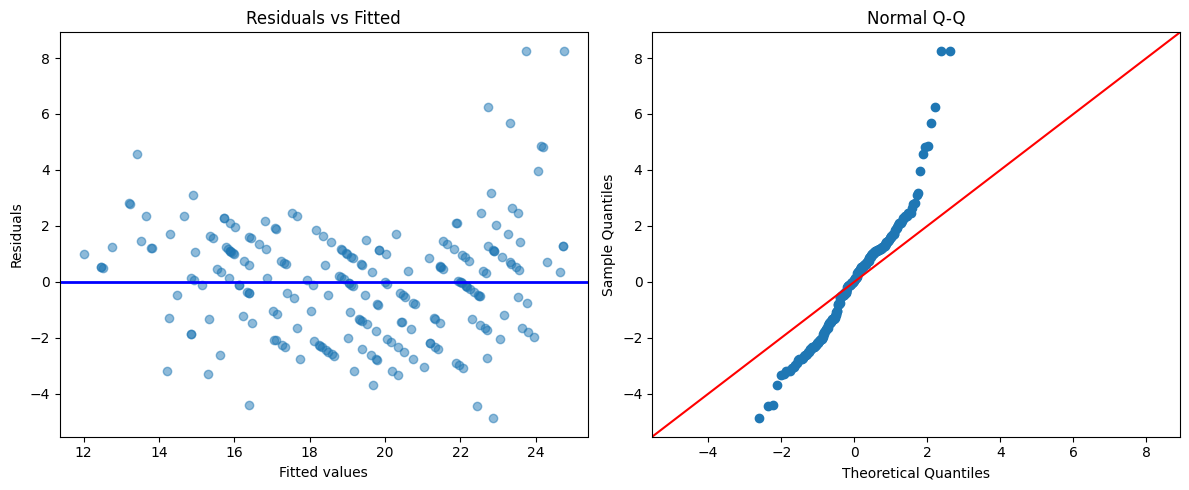

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # create 1x2 subplot grid

# Residual plot
axes[0].scatter(fit3.fittedvalues, fit3.resid, alpha=0.5)  # plot residuals vs fitted values
axes[0].axhline(y=0, color='blue', linewidth=2)  # add horizontal line at y=0
axes[0].set_xlabel('Fitted values')  # x-axis label
axes[0].set_ylabel('Residuals')  # y-axis label
axes[0].set_title('Residuals vs Fitted')  # subplot title

# QQ plot
sm.qqplot(fit3.resid, line='45', ax=axes[1])  # create QQ plot with 45-degree reference line
axes[1].set_title('Normal Q-Q')  # subplot title

plt.tight_layout()  # adjust spacing between subplots
plt.show()  # display the figure

The `plt.subplots()` function creates a figure with multiple subplots. The arguments `(1, 2)` specify 1 row and 2 columns. The `figsize` parameter sets the overall figure dimensions.

For the residual plot, we use `.fittedvalues` to get predicted values and `.resid` to get residuals. The scatter plot helps check for patterns that would indicate violations of linearity or homoscedasticity assumptions.

The `sm.qqplot()` function creates a quantile-quantile plot comparing the residual distribution to a normal distribution. The `line='45'` parameter adds a 45-degree reference line. Points following this line indicate normally distributed residuals.

## 3. F-test

With multiple variables, we need to test whether a set of $\beta$'s being 0. For example, we want to ask whether $\beta_{Seating}$ and $\beta_{Cylinder}$ are not useful. Mathematically, we test the null hypothesis

$H_0: \beta_{Seating} = \beta_{Cylinder} = 0$ vs. $H_1:$ at least one of $\beta_{Seating}, \beta_{Cylinder}$ is non-zero

To put it in another way, $H_0$ is the reduced model:

$y_i = \beta_0 + \beta_{Length}x_{i,Length} + \beta_{HP}x_{i,HP} + \beta_{Width}x_{i,Width} + \beta_{Displacement}x_{i,Displacement} + \epsilon_i$

and $H_1$ is the full model:

$y_i = \beta_0 + \beta_{Length}x_{i,Length} + \beta_{HP}x_{i,HP} + \beta_{Width}x_{i,Width} + \beta_{Seating}x_{i,Seating} + \beta_{Cylinders}x_{i,Cylinders} + \beta_{Displacement}x_{i,Displacement} + \epsilon_i$

**Theorem:** Assume the linear model assumptions hold, then under the $H_0$

$F_{stat} := \frac{RSS(H_0) - RSS(H_1)/df_1}{RSS(H_1)/df_2} \sim F_{df_1, df_2}$

where
- $df_1$ = # of parameters in $H_1$ - # of parameters in $H_0$
- $df_2$ = # of observations - # of parameters in $H_1$

The p-value is

p-value = $P(F_{df_1, df_2} > F_{stat})$

To explore, we can run a model without Seating and Cylinder:

In [21]:
fit3_0 = smf.ols('MPG_City ~ Horsepower + Length + Width + Displacement', data=data1).fit()  # reduced model
rss_h0 = np.sum(fit3_0.resid**2)  # RSS under H0 using numpy sum and element-wise squaring
rss_h1 = np.sum(fit3.resid**2)  # RSS under H1 (full model)
print(f"RSS(H_0) = {rss_h0:.2f}")  # print RSS for reduced model
print(f"RSS(H_1) = {rss_h1:.2f}")  # print RSS for full model

RSS(H_0) = 923.82
RSS(H_1) = 907.76


The reduced model excludes Seating and Cylinders. The `np.sum()` function adds up all elements in an array. The `**2` operator squares each residual element-wise. RSS measures the unexplained variation in each model.

Now let's calculate the F-statistic:

In [22]:
f_stat = ((rss_h0 - rss_h1) / 2) / (rss_h1 / 219)  # F-statistic with df1=2, df2=219
print(f"F-statistic = {f_stat:.4f}")  # display F-statistic

# Calculate p-value
p_value = 1 - stats.f.cdf(f_stat, 2, 219)  # upper tail probability from F distribution
print(f"p-value = {p_value:.4f}")  # display p-value

F-statistic = 1.9373
p-value = 0.1466


The F-statistic formula divides the improvement in RSS (scaled by degrees of freedom) by the residual variance estimate. The numerator degrees of freedom is 2 (two coefficients tested), and denominator degrees of freedom is 219 (226 observations - 7 parameters). The `stats.f.cdf()` function computes the cumulative distribution function of the F distribution. We subtract from 1 to get the upper tail probability.

### 3.1 anova() function

We can use the anova function to carry out the above F-test:

In [23]:
from statsmodels.stats.anova import anova_lm  # import ANOVA function for linear models

anova_result = anova_lm(fit3_0, fit3)  # compare nested models
print(anova_result)  # display ANOVA table

   df_resid         ssr  df_diff    ss_diff        F    Pr(>F)
0     221.0  923.822887      0.0        NaN      NaN       NaN
1     219.0  907.762619      2.0  16.060268  1.93729  0.146555


The `anova_lm()` function performs an F-test comparing two nested models. It automatically calculates the RSS for each model, the degrees of freedom, the F-statistic, and the p-value. The first argument should be the reduced model, and the second should be the full model.

**Conclusion:** The p-value being 0.147 gives us no evidence to reject the null hypothesis. The data does not provide strong evidence that Seating and Cylinders improve the model.

Questions based on the summary for fit3:
- What is the F statistics from the model summary?
- Can you perform an F-test for each $\beta$ being 0? What is the relationship between the F-test and the t-test?

Let's calculate the Total Sum of Squares:

In [24]:
TSS = np.sum((data1['MPG_City'] - data1['MPG_City'].mean())**2)  # total sum of squares
print(f"TSS = {TSS:.2f}")  # display TSS

TSS = 3076.99


TSS measures the total variation in the response variable. It's calculated as the sum of squared deviations from the mean. The `.mean()` method computes the average of MPG_City values.

Roughly speaking, the linearity, homoscedasticity and normality assumptions are satisfied. (Very subjective!)

## 4. Categorical Predictors

Let's use Continent as one variable. It has three categories. We explore the following questions:

- Are Asian cars more efficient?
- How does Continent affect the MPG?

In [25]:
print(data1['Continent'].unique())  # display unique values in Continent column

['As' 'E' 'Am']


The `.unique()` method returns an array of distinct values in the Continent column. This shows us the three categories: America, Asia, and Europe.

Model with a categorical variable is termed as a "One Way ANOVA"

First, we get the sample means and sample standard error for each group:

In [26]:
continent_summary = data1.groupby('Continent').agg({  # group by Continent and aggregate
    'MPG_City': ['mean', 'std', 'count']  # calculate mean, std dev, and count for MPG_City
})
print(continent_summary)  # display summary statistics by continent

            MPG_City                
                mean       std count
Continent                           
Am         18.729730  2.985340    74
As         20.244898  4.196369    98
E          18.259259  3.216615    54


The `.groupby()` method splits the DataFrame into groups based on Continent values. The `.agg()` method applies multiple aggregation functions. The dictionary specifies which columns to aggregate and what functions to apply. This gives us mean MPG, standard deviation, and sample size for each continent.

Let's visualize the distributions:

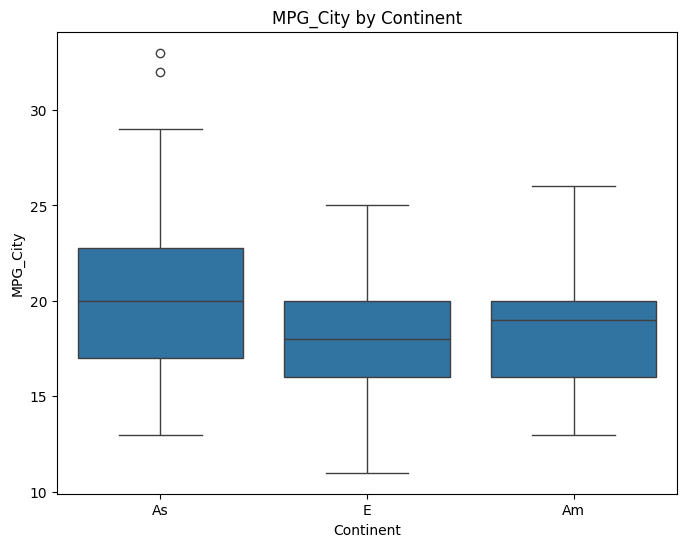

In [27]:
plt.figure(figsize=(8, 6))  # create new figure
sns.boxplot(x='Continent', y='MPG_City', data=data1)  # create boxplot using seaborn
plt.title('MPG_City by Continent')  # add title
plt.show()  # display plot

The `sns.boxplot()` function creates box-and-whisker plots showing the distribution of MPG_City for each continent. The box shows the interquartile range, the line inside shows the median, and the whiskers extend to show the range of the data (excluding outliers).

We use indicator predictors to analyze the effect of Continent.

### 4.1 Model 1 - One Way ANOVA

$y_i|x=Am = \mu_{Am} + \epsilon_i$
$y_i|x=As = \mu_{As} + \epsilon_i$
$y_i|x=E = \mu_{E} + \epsilon_i$

where $\mu_{Am}$, $\mu_{As}$ and $\mu_E$ are the mean MPG of each continent and $\epsilon \sim (0, \sigma^2)$. We want to compare the three means and this can be done through linear model with indicator functions.

We are interested in the following hypotheses:

$H_0: \mu_{Am} = \mu_{As} = \mu_E$

Let
- Am as the base
- $x_1$ be the indicator function of being As, i.e. $I\{Continent = As\}$
- $x_2$ be the indicator function of being E $I\{Continent = E\}$

Then the above Anova model is same as

$y_i = \beta_{Am} + \beta_{As}x_{1,i} + \beta_E x_{2,i} + \epsilon_i = \beta_{Am} + \beta_{As}I\{Continent = As\} + \beta_E I\{Continent = E\} + \epsilon_i$

where
- $\beta_{Am} = \mathbf{E}(MPG|Am)$
- $\beta_{As} = \mathbf{E}(MPG|As) - \mathbf{E}(MPG|Am)$: the increment between Asia and America
- $\beta_E = \mathbf{E}(MPG|E) - \mathbf{E}(MPG|Am)$: the increment between Europe and America

To test
$H_0: \mu_{Am} = \mu_{As} = \mu_E$
is same as to test
$H_0: \beta_{As} = \beta_E = 0$

Now we can use regression to fit the model and carry out the tests:

In [28]:
fit_continent = smf.ols('MPG_City ~ Continent', data=data1).fit()  # ANOVA model
print(fit_continent.summary())  # display regression output

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.517
Date:                Mon, 29 Sep 2025   Prob (F-statistic):            0.00178
Time:                        15:59:13   Log-Likelihood:                -609.32
No. Observations:                 226   AIC:                             1225.
Df Residuals:                     223   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.7297      0.420     

When a categorical variable is used in the formula, statsmodels automatically creates dummy variables. It chooses one category as the reference (base) level and creates indicator variables for the other categories. By default, it uses alphabetical ordering, so "Am" (America) becomes the base level.

The F-test here tests $H_0: \beta_{As} = \beta_E = 0$, i.e., there is no difference among the three regions. We reject $H_0$ at $\alpha = 0.01$, and conclude the mean MPG's are different among the three regions.

We can see the coding from the design matrix:

In [29]:
design_matrix = pd.DataFrame(  # create DataFrame from design matrix
    fit_continent.model.exog,  # extract design matrix from model
    columns=fit_continent.model.exog_names  # use column names from model
)
print(design_matrix.iloc[5:10])  # display rows 5-9 of design matrix

   Intercept  Continent[T.As]  Continent[T.E]
5        1.0              1.0             0.0
6        1.0              0.0             1.0
7        1.0              0.0             1.0
8        1.0              0.0             1.0
9        1.0              0.0             1.0


The `.model.exog` attribute contains the design matrix (X matrix) used in the regression. This shows how categorical variables are converted to numeric indicators. Each row has a 1 for the intercept, and then 0s or 1s for the continent indicators.

**Remarks:** We can see Am is the base, each coefficient captures the effect of the level vs. Am.

We can also fit a model without intercept $\beta_0$:

In [30]:
fit_continent_2 = smf.ols('MPG_City ~ 0 + Continent', data=data1).fit()  # model without intercept using 0 +
print(fit_continent_2.summary())  # display results

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     6.517
Date:                Mon, 29 Sep 2025   Prob (F-statistic):            0.00178
Time:                        16:00:05   Log-Likelihood:                -609.32
No. Observations:                 226   AIC:                             1225.
Df Residuals:                     223   BIC:                             1235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Continent[Am]    18.7297      0.420     44.624

Adding `0 +` to the formula removes the intercept term. Now instead of one reference category, each continent gets its own coefficient representing its mean MPG_City directly (not as a difference from a base level).

Let's examine the design matrix for this model:

In [ ]:
design_matrix_2 = pd.DataFrame(  # create DataFrame
    fit_continent_2.model.exog,  # extract design matrix
    columns=fit_continent_2.model.exog_names  # column names
)
print(design_matrix_2.iloc[5:10])  # show rows 5-9

Without an intercept, the design matrix has a 1 in exactly one column per row, indicating which continent that observation belongs to. Each coefficient now directly estimates the mean for that continent.

**Contrasts**

To estimate the mean difference between two regions, we can calculate contrasts:

In [31]:
# Calculate contrast between Asia and America
asia_coef = fit_continent.params['Continent[T.As]']  # extract Asia coefficient
contrast_asia_am = asia_coef  # this is already the difference from Am (base)
se_asia_am = fit_continent.bse['Continent[T.As]']  # standard error
t_stat = contrast_asia_am / se_asia_am  # t-statistic
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), fit_continent.df_resid))  # two-sided p-value

print(f"Contrast As - Am: {contrast_asia_am:.3f}")  # display contrast
print(f"Standard Error: {se_asia_am:.3f}")  # display SE
print(f"t-statistic: {t_stat:.3f}")  # display t-stat
print(f"p-value: {p_value:.4f}")  # display p-value

Contrast As - Am: 1.515
Standard Error: 0.556
t-statistic: 2.725
p-value: 0.0069


The coefficient for `Continent[T.As]` already represents the difference between Asia and America (since America is the base). The standard error, t-statistic, and p-value test whether this difference is statistically significant. The `stats.t.cdf()` function gives the cumulative distribution function of the t-distribution.

To compare Asia with Europe:

In [32]:
# Calculate contrast between Asia and Europe
contrast_asia_europe = (fit_continent.params['Continent[T.As]'] -
                        fit_continent.params['Continent[T.E]'])  # difference of coefficients
print(f"Contrast As - E: {contrast_asia_europe:.3f}")  # display contrast

Contrast As - E: 1.986


Since both Asia and Europe coefficients are differences from America, subtracting Europe's coefficient from Asia's gives us the Asia-Europe difference.

**Changing base level**

We can choose the base level as we want. We demonstrate this by setting up European cars as the base category:

In [33]:
# Create new categorical with Europe as reference
data1['Continent_reordered'] = pd.Categorical(data1['Continent'],  # create categorical type
                                               categories=['E', 'Am', 'As'],  # specify order
                                               ordered=False)  # not ordered categorical
fit_europe_base = smf.ols('MPG_City ~ Continent_reordered', data=data1).fit()  # fit with new reference
print(fit_europe_base.summary().tables[1])  # display coefficient table only

                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    18.2593      0.491     37.162      0.000      17.291      19.228
Continent_reordered[T.Am]     0.4705      0.646      0.728      0.467      -0.803       1.744
Continent_reordered[T.As]     1.9856      0.612      3.245      0.001       0.780       3.192


The `pd.Categorical()` function creates a categorical data type with a specified order. The first category in the list becomes the reference level. Setting `ordered=False` means the categories don't have a natural ordering (like small/medium/large would).

Note that:
- The F-test should be the same
- The coefficients are different but the mean estimates are the same

**Drawback of one way Anova:** other factors should be also taken into consideration.

### 4.2 Model 2 - Model without Interaction

Let us take one important variable Horsepower in addition to the Continent. We first show three scatter plots by region with regression lines added. Though the slopes seem to be a little different, for the sake of simple interpretation we will fit a usual additive model without interaction, that is, we assume the effect of HP over MPG_City are the same.

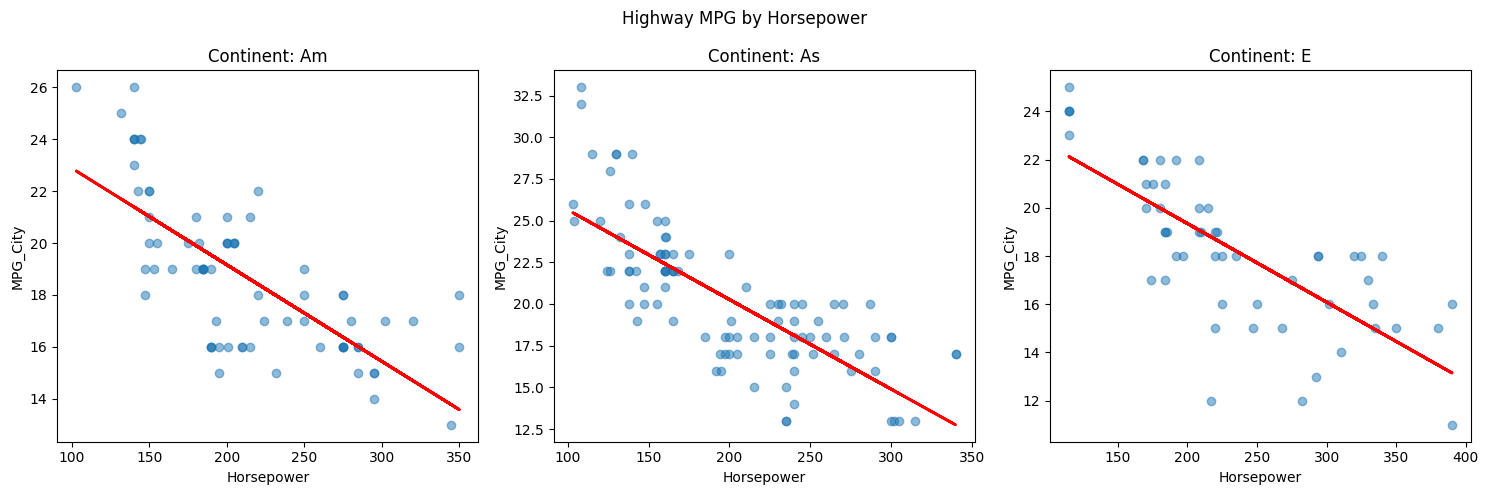

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # create 1x3 subplot grid

for i, continent in enumerate(['Am', 'As', 'E']):  # loop through continents with index
    subset = data1[data1['Continent'] == continent]  # filter data for continent
    axes[i].scatter(subset['Horsepower'], subset['MPG_City'], alpha=0.5)  # scatter plot

    # Fit line for this continent
    z = np.polyfit(subset['Horsepower'], subset['MPG_City'], 1)  # fit degree-1 polynomial (line)
    p = np.poly1d(z)  # create polynomial function from coefficients
    axes[i].plot(subset['Horsepower'], p(subset['Horsepower']), "r-", linewidth=2)  # plot line

    axes[i].set_title(f'Continent: {continent}')  # subplot title with f-string
    axes[i].set_xlabel('Horsepower')  # x-axis label
    axes[i].set_ylabel('MPG_City')  # y-axis label

plt.suptitle('Highway MPG by Horsepower')  # overall figure title
plt.tight_layout()  # adjust subplot spacing
plt.show()  # display figure

The `enumerate()` function returns both the index and value when looping. We use boolean indexing `data1['Continent'] == continent` to filter data for each continent. The `np.polyfit()` function fits a polynomial of specified degree (1 for linear) using least squares. The `np.poly1d()` creates a polynomial function that can be evaluated at any points.

We next plot our models without interactions:

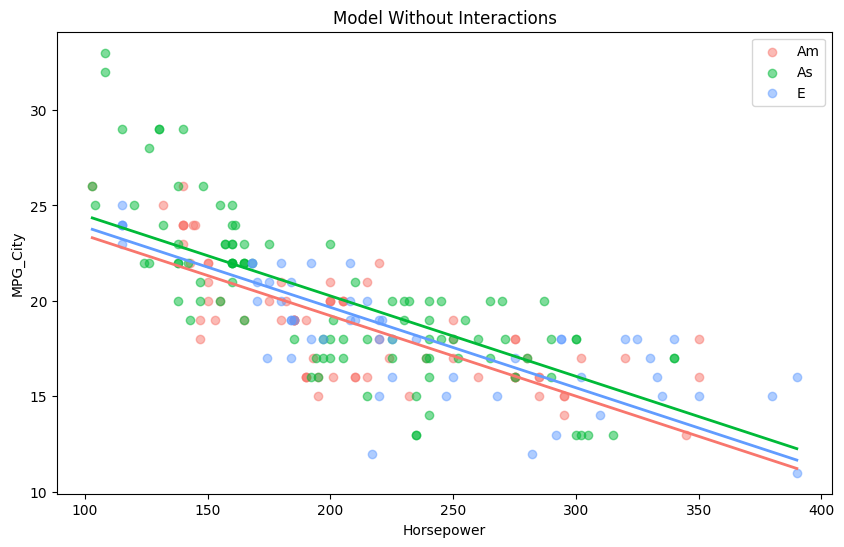

In [35]:
fit_no_interaction = smf.ols('MPG_City ~ Continent + Horsepower', data=data1).fit()  # additive model
coefs = fit_no_interaction.params  # extract all coefficients

plt.figure(figsize=(10, 6))  # create figure
colors = {'Am': '#F8766D', 'As': '#00BA38', 'E': '#619CFF'}  # color dictionary

# Plot data points
for continent in ['Am', 'As', 'E']:  # loop through continents
    subset = data1[data1['Continent'] == continent]  # filter data
    plt.scatter(subset['Horsepower'], subset['MPG_City'],  # scatter plot
               color=colors[continent], alpha=0.5, label=continent)  # with color and label

# Plot parallel lines (same slope, different intercepts)
hp_range = np.linspace(data1['Horsepower'].min(), data1['Horsepower'].max(), 100)  # x values for lines

# America (base)
plt.plot(hp_range, coefs['Intercept'] + coefs['Horsepower'] * hp_range,  # base line
        color=colors['Am'], linewidth=2)

# Asia
plt.plot(hp_range, coefs['Intercept'] + coefs['Continent[T.As]'] + coefs['Horsepower'] * hp_range,  # Asia line
        color=colors['As'], linewidth=2)

# Europe
plt.plot(hp_range, coefs['Intercept'] + coefs['Continent[T.E]'] + coefs['Horsepower'] * hp_range,  # Europe line
        color=colors['E'], linewidth=2)

plt.xlabel('Horsepower')  # x-axis label
plt.ylabel('MPG_City')  # y-axis label
plt.title('Model Without Interactions')  # plot title
plt.legend()  # show legend
plt.show()  # display plot

The dictionary `colors` maps continent names to hex color codes. The `np.linspace()` function creates 100 evenly spaced points between the minimum and maximum horsepower values. For the additive model, all lines have the same slope (the Horsepower coefficient) but different intercepts. The America line uses just the intercept, Asia adds the Asia coefficient, and Europe adds the Europe coefficient.

For a model without interaction, we assume that the effect of HP on MPG_City is the same regardless of which region the cars are produced.

$MPG = \beta_{Am} + \beta_{As} \cdot I(Continent=As) + \beta_E \cdot I(Continent=E) + \beta_1 \cdot HP + \epsilon$

In [36]:
fit_no_interaction = smf.ols('MPG_City ~ Horsepower + Continent', data=data1).fit()  # fit model
print(fit_no_interaction.summary())  # display results

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     95.87
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           7.87e-40
Time:                        16:02:42   Log-Likelihood:                -521.84
No. Observations:                 226   AIC:                             1052.
Df Residuals:                     222   BIC:                             1065.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          27.6462      0.623     

The formula `MPG_City ~ Horsepower + Continent` specifies an additive model where Horsepower and Continent effects are independent. The coefficient for Horsepower represents the change in MPG for a one-unit increase in HP, holding continent constant.

To test whether Continent is significant after controlling for Horsepower, we can use ANOVA:

In [37]:
# Compare models with and without Continent
fit_hp_only = smf.ols('MPG_City ~ Horsepower', data=data1).fit()  # model with HP only
anova_result = anova_lm(fit_hp_only, fit_no_interaction)  # F-test
print(anova_result)  # display ANOVA table

   df_resid          ssr  df_diff    ss_diff         F  Pr(>F)
0     224.0  1386.396304      0.0        NaN       NaN     NaN
1     222.0  1340.434072      2.0  45.962232  3.806086  0.0237


This F-test compares a model with only Horsepower to a model with both Horsepower and Continent. The p-value = 0.024 provides weak evidence of rejecting the null hypothesis that there are no Continent effects after accounting for Horsepower.

#### 4.2.1 Type II ANOVA

We can also use Type II ANOVA to test each factor:

In [38]:
from statsmodels.stats.anova import anova_lm  # already imported above

anova_type2 = anova_lm(fit_no_interaction, typ=2)  # Type II ANOVA
print(anova_type2)  # display Type II ANOVA table

                 sum_sq     df           F        PR(>F)
Continent     45.962232    2.0    3.806086  2.369984e-02
Horsepower  1566.653342    1.0  259.465981  3.477534e-39
Residual    1340.434072  222.0         NaN           NaN


Type II ANOVA tests each factor after accounting for all other factors in the model. The `typ=2` parameter specifies Type II sums of squares. This shows the unique contribution of each predictor.

We fail to reject $H_0$ at $\alpha = 0.01$, i.e., controlling HP, we do not have strong evidence to say the effect of Continent is different.

**Remark:** Models without interactions are simple and we can test Continent effects directly. But we may ask ourselves is this assumption reasonable?

### 4.3 Model 3 - Model with Interaction

It is possible that HP effects depend on Continent.

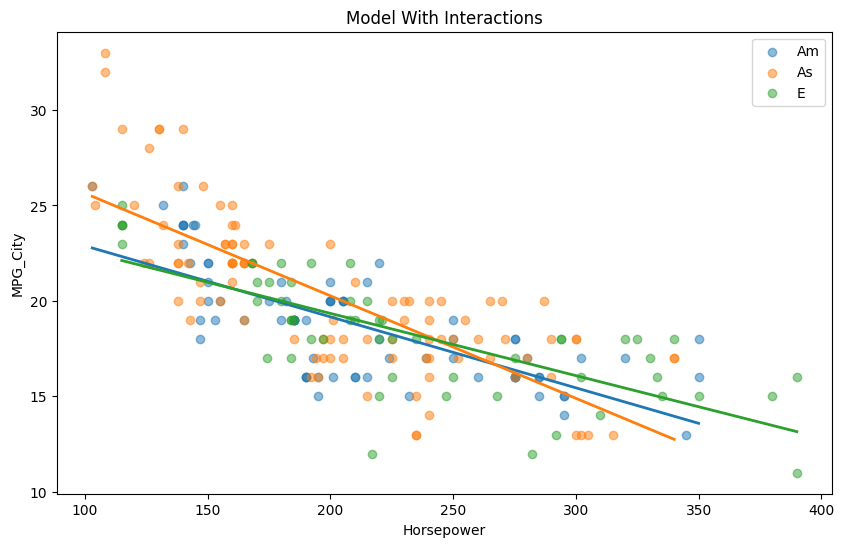

In [39]:
# Plot with separate regression lines by continent
plt.figure(figsize=(10, 6))  # create figure

for continent in ['Am', 'As', 'E']:  # loop through continents
    subset = data1[data1['Continent'] == continent]  # filter data
    plt.scatter(subset['Horsepower'], subset['MPG_City'],  # scatter plot
               alpha=0.5, label=continent)  # with transparency and label

    # Fit separate regression for each continent
    z = np.polyfit(subset['Horsepower'], subset['MPG_City'], 1)  # linear fit
    p = np.poly1d(z)  # polynomial function
    hp_sorted = np.sort(subset['Horsepower'])  # sort HP values for smooth line
    plt.plot(hp_sorted, p(hp_sorted), linewidth=2)  # plot regression line

plt.xlabel('Horsepower')  # x-axis label
plt.ylabel('MPG_City')  # y-axis label
plt.title('Model With Interactions')  # title
plt.legend()  # show legend
plt.show()  # display

This plot shows separate regression lines for each continent, allowing different slopes. The visual suggests Asian cars with smaller HP are more efficient, while European cars with larger HP are more efficient.

To capture this effect, we introduce models with interactions MPG ~ Horsepower by Continent.

$y_i|Am, HP = \beta_{Am} + \beta_{1Am} \cdot HP + \epsilon_i$
$y_i|As, HP = \beta_{As} + \beta_{1As} \cdot HP + \epsilon_i$
$y_i|E, HP = \beta_E + \beta_{1E} \cdot HP + \epsilon_i$

This can be done through the following indicators:

$MPG = \beta_{Am} + \beta_{As} \cdot I(Continent=As) + \beta_E \cdot I(Continent=E) + \beta_{1Am} \cdot HP + \beta_{1As} \cdot HP \cdot I(Continent=As) + \beta_{1E} \cdot HP \cdot I(Continent=E) + \epsilon$

Similarly,
- $\beta_{As}$ is the increment of intercept between Asian and American
- $\beta_{1As}$ is the increment of slope between Asian and American

Use regression with interaction:

In [40]:
fit_with_interaction = smf.ols('MPG_City ~ Horsepower * Continent', data=data1).fit()  # * creates interaction
print(fit_with_interaction.summary())  # display results

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     63.27
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.08e-40
Time:                        16:04:26   Log-Likelihood:                -515.05
No. Observations:                 226   AIC:                             1042.
Df Residuals:                     220   BIC:                             1063.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The asterisk `*` operator in the formula creates both main effects and interaction terms. It's equivalent to `Horsepower + Continent + Horsepower:Continent`. The interaction terms allow the effect of Horsepower to vary by Continent.

**Question:** Is the interaction effect significant? Are the effects of HP the same across Continent?

To test there is no interaction is same as to test
$H_0: \beta_{1AS} = \beta_{1E} = 0$

which we can do with ANOVA:

In [41]:
anova_interaction = anova_lm(fit_no_interaction, fit_with_interaction)  # compare models
print(anova_interaction)  # display F-test results

   df_resid          ssr  df_diff    ss_diff         F    Pr(>F)
0     222.0  1340.434072      0.0        NaN       NaN       NaN
1     220.0  1262.161077      2.0  78.272994  6.821657  0.001335


This F-test compares the additive model (no interaction) with the interaction model. The degrees of freedom difference is 2 (two interaction terms added).

We can also use Type II ANOVA:

In [42]:
anova_type2_interaction = anova_lm(fit_with_interaction, typ=2)  # Type II ANOVA
print(anova_type2_interaction)  # display results

                           sum_sq     df           F        PR(>F)
Continent               45.962232    2.0    4.005705  1.955559e-02
Horsepower            1566.653342    1.0  273.074286  2.009670e-40
Horsepower:Continent    78.272994    2.0    6.821657  1.335444e-03
Residual              1262.161077  220.0         NaN           NaN


Type II ANOVA shows the unique contribution of each term. The interaction term `Horsepower:Continent` tests whether the HP effect varies by continent.

We do reject the null hypothesis with a p-value of 0.0013, not terribly small. That indicates some interaction effect of HP and Continent.

So the final conclusion would be:
- Asian cars with smaller HP are more efficient
- European cars with larger HP are more efficient

## 5. A More Flexible Model

We now try a model which includes all sensible variables.

In [43]:
# Remove columns we don't want in the model
names_exclude = ['Make.Model', 'MPG_Hwy', 'Make']  # list of columns to exclude
data2 = data1.drop(columns=names_exclude)  # drop specified columns
print(data2.columns.tolist())  # display remaining columns

['Continent', 'MPG_City', 'Horsepower', 'Weight', 'Length', 'Width', 'Seating', 'Cylinders', 'Displacement', 'Transmission', 'Continent_reordered']


The `.drop()` method with `columns` parameter removes specified columns from the DataFrame. This creates a new DataFrame with only the variables we want to include in our model.

Or using alternative selection method:

In [44]:
# Alternative: select all columns except those to exclude
data2 = data1[data1.columns.difference(names_exclude)]  # use set difference
print(data2.columns.tolist())  # display columns

['Continent', 'Continent_reordered', 'Cylinders', 'Displacement', 'Horsepower', 'Length', 'MPG_City', 'Seating', 'Transmission', 'Weight', 'Width']


The `.columns.difference()` method performs set subtraction, keeping all columns except those in the exclude list.

**QUESTION:** What would have happened if you have added Make.Model into the model?

Let's fit a model with all remaining variables:

In [46]:
# Remove columns we don't want in the model
names_exclude = ['Make.Model', 'MPG_Hwy', 'Make']  # list of columns to exclude
data2 = data1.drop(columns=names_exclude)  # drop specified columns
print(data2.columns.tolist())  # display remaining columns

# Fit a model with all remaining variables
# The dot notation '.' does not work correctly with multiple categorical variables
fit_all = smf.ols('MPG_City ~ Continent + Horsepower + Weight + Length + Width + Seating + Cylinders + Displacement + Transmission', data=data2).fit()
print(fit_all.summary())  # display comprehensive results

['Continent', 'MPG_City', 'Horsepower', 'Weight', 'Length', 'Width', 'Seating', 'Cylinders', 'Displacement', 'Transmission', 'Continent_reordered']
                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     79.25
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           3.72e-69
Time:                        16:07:33   Log-Likelihood:                -432.23
No. Observations:                 226   AIC:                             888.5
Df Residuals:                     214   BIC:                             929.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t

The formula `MPG_City ~ .` uses dot notation to include all columns in data2 except MPG_City as predictors. This is a convenient shorthand when you want to include many variables.

The t-table is pretty messy, many variables are not significant. Let's use Type II ANOVA:

In [47]:
anova_all = anova_lm(fit_all, typ=2)  # Type II ANOVA for all variables
print(anova_all)  # display ANOVA table

                  sum_sq     df          F        PR(>F)
Continent      10.136662    2.0   1.788393  1.697189e-01
Transmission    5.035542    2.0   0.888412  4.128200e-01
Horsepower     33.173264    1.0  11.705398  7.463976e-04
Weight        229.413645    1.0  80.950067  1.267689e-16
Length         13.985447    1.0   4.934854  2.736790e-02
Width           0.091599    1.0   0.032321  8.574946e-01
Seating        14.009568    1.0   4.943366  2.723659e-02
Cylinders       2.682933    1.0   0.946690  3.316618e-01
Displacement    0.516480    1.0   0.182243  6.698816e-01
Residual      606.479055  214.0        NaN           NaN


Type II ANOVA helps us see which variables contribute significantly after accounting for all others.

**Comments:**
- Continent is not needed after accounting for all other variables. That says we don't have evidence to show that one continent tends to produce more efficient cars than the others.
- Can we drop all the variables with p-values larger than 0.05?
- Take a look at Transmission. There are predominantly automatic cars. Perhaps we should only include automatic cars and change our population.

Let's check the distribution of Transmission types:

In [48]:
print(data2['Transmission'].value_counts())  # count occurrences of each transmission type

Transmission
automatic        211
manual            12
cont_variable      3
Name: count, dtype: int64


The `.value_counts()` method counts unique values in a Series. We see that automatic transmissions dominate the dataset.

- We don't have to use a model with all p-values being small!
- Model diagnosis: check if three assumptions of linear models are met.

Let's check residual plots:

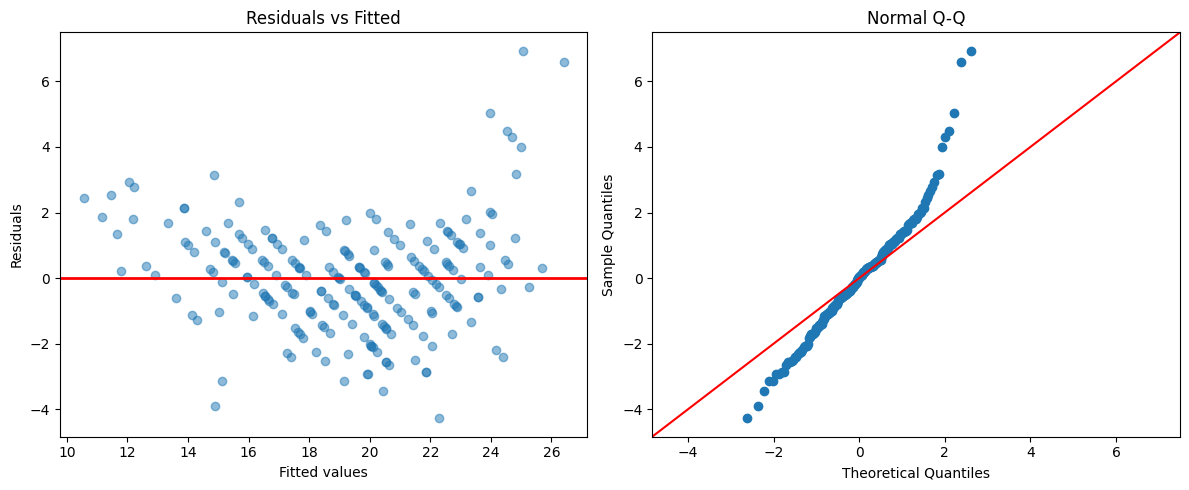

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # create subplots

# Residuals vs Fitted
axes[0].scatter(fit_all.fittedvalues, fit_all.resid, alpha=0.5)  # residual plot
axes[0].axhline(y=0, color='red', linewidth=2)  # reference line at zero
axes[0].set_xlabel('Fitted values')  # x label
axes[0].set_ylabel('Residuals')  # y label
axes[0].set_title('Residuals vs Fitted')  # title

# QQ plot
sm.qqplot(fit_all.resid, line='45', ax=axes[1])  # normal QQ plot
axes[1].set_title('Normal Q-Q')  # title

plt.tight_layout()  # adjust layout
plt.show()  # display

Both plots look reasonably good, suggesting the linear model assumptions are approximately met.

We now provide confidence interval for the mean of cars like our newcar:

In [50]:
pred_mean_new = fit_all.get_prediction(newcar)  # get prediction object
ci_mean = pred_mean_new.summary_frame(alpha=0.05)  # extract confidence interval
print("Confidence interval for mean:")  # label
print(ci_mean[['mean', 'mean_ci_lower', 'mean_ci_upper']])  # display results

Confidence interval for mean:
       mean  mean_ci_lower  mean_ci_upper
0  17.73219      16.349024      19.115355


This gives us the expected mean MPG_City for all cars with the specifications of our new car design, along with the uncertainty in that estimate.

We also provide prediction interval on this newcar:

In [51]:
pred_new = fit_all.get_prediction(newcar)  # get prediction
pi = pred_new.summary_frame(alpha=0.05)  # extract intervals
print("Prediction interval for new car:")  # label
print(pi[['mean', 'obs_ci_lower', 'obs_ci_upper']])  # display prediction interval
print(f"Standard error: {pred_new.se_obs[0]:.3f}")  # standard error for prediction
print(f"Residual scale: {np.sqrt(fit_all.scale):.3f}")  # residual standard error

Prediction interval for new car:
       mean  obs_ci_lower  obs_ci_upper
0  17.73219     14.137182     21.327198
Standard error: 1.824
Residual scale: 1.683


The prediction interval is wider than the confidence interval because it accounts for individual variation around the mean.

## 6. Summary

Summary about linear models:

- Linear model is simple and has nice interpretation
- Coefficient for each predictor depends on the model  
- LS automatically adjusts the unit of predictors
- t-tests: the effect of each coeff. (Does not rank the importance of the predictors)
- F-tests: test a set of predictors (t-tests being special cases!)
- Model assumptions: all in residuals

Last but not least: linear models used here only show associations between predictors and the response on average. We CANNOT conclude causality at all.

**BIGGEST QUESTION:** How to identify a set of important variables or which model to use?

Choose models with small "prediction errors" is one way to go. We will discuss more in a lecture about model selection.

## 7. Appendices

### 7.1 Appendix 1: Clean dataset

We show how we cleaned the dataset Cars_04.csv into car_04_regular.csv:

Saving Cars_04.csv to Cars_04 (1).csv
Original shape: (242, 17)
After removing NAs: (182, 17)
['Make/Model', 'Continent', 'MPG_City', 'Horsepower', 'Weight', 'Seating', 'Length', 'MPG_Hwy', 'Origin', 'Transmission', 'EPA_Class', 'Width', 'Displacement', 'Cylinders', 'Make', 'Model', 'Turndiam']
  Make/Model Continent  MPG_City  Horsepower  Weight  Seating  Length  \
0   Acura_RL        As        18         225   3.898        5   196.6   
1   Acura_TL        As        20         270   3.575        5   189.3   
2  Acura_TSX        As        23         200   3.318        5   183.3   
3  Acura_RSX        As        25         160   2.771        4   172.2   
4  Acura_NSX        As        17         252   3.197        2   174.2   

   MPG_Hwy  Origin Transmission   EPA_Class  Width  Displacement  Cylinders  \
0       24       3    automatic     midsize   71.6           3.5          6   
1       28       3    automatic     midsize   72.2           3.2          6   
2       32       3    automa

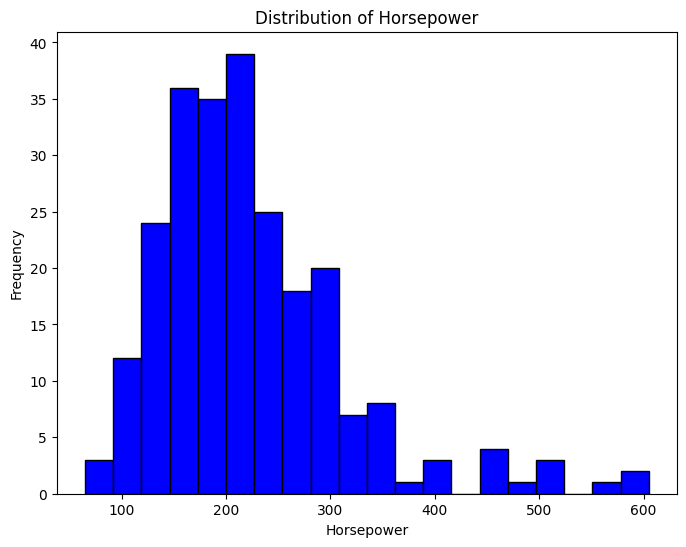

Cars with HP > 400:
['Aston_Martin_V12_Vanquish', 'Bentley_ArnageT', 'Bentley_ContinentalGT', 'Dodge_Viper', 'Ferrari_575M_Maranello', 'Lamborghini_Gallardo', 'Lamborghini_Murcielago', 'Mercedes-Benz_CL600', 'Mercedes-Benz_E55AMG', 'Porsche_CarreraGT', 'Rolls-Royce_Phantom']
Final shape: (226, 13)


In [54]:
# Load and clean the original dataset
uploaded = files.upload()  # upload local file
data = pd.read_csv("Cars_04.csv")  # read raw data
print(f"Original shape: {data.shape}")  # display dimensions

# Remove rows with missing values
data_comp = data.dropna()  # drop any row with NaN values
print(f"After removing NAs: {data_comp.shape}")  # new dimensions

# Explore the data
print(data.columns.tolist())  # column names
print(data.head())  # first few rows
print(data.describe())  # summary statistics

# Plot horsepower distribution
plt.figure(figsize=(8, 6))  # create figure
plt.hist(data['Horsepower'], bins=20, color='blue', edgecolor='black')  # histogram with 20 bins
plt.xlabel('Horsepower')  # x label
plt.ylabel('Frequency')  # y label
plt.title('Distribution of Horsepower')  # title
plt.show()  # display

# Find super powerful cars
print("Cars with HP > 400:")  # label
print(data[data['Horsepower'] > 400]['Make/Model'].tolist())  # list high HP cars

# Focus on "regular" cars
datacar = data[(data['Horsepower'] <= 390) & (data['Horsepower'] > 100)]  # filter by HP range

# Select relevant variables
variables = ['Make/Model', 'Continent', 'MPG_City', 'MPG_Hwy',  # list of columns to keep
            'Horsepower', 'Weight', 'Length', 'Width',
            'Seating', 'Cylinders', 'Displacement',
            'Make', 'Transmission']

data1 = datacar[variables]  # subset columns
print(f"Final shape: {data1.shape}")  # final dimensions

# Save cleaned data
data1.to_csv("car_04_regular.csv", index=False)  # write to CSV without row indices

This cleaning process removes missing values, filters out extreme horsepower values to focus on regular consumer vehicles, and selects only the relevant variables for our analysis. The `index=False` parameter prevents pandas from writing row numbers to the CSV file.

### 7.2 Appendix 2: Using matrix formulas to obtain OLS estimates

Take fit3 and recreate $\hat{\beta}$'s:

In [55]:
# Extract design matrix and response
X = fit3.model.exog  # design matrix (X)
y = fit3.model.endog  # response vector (y)
print(f"Design matrix shape: {X.shape}")  # dimensions of X

# Calculate beta hat using matrix formula
XtX = X.T @ X  # X transpose times X using @ operator for matrix multiplication
XtX_inv = np.linalg.inv(XtX)  # inverse of XtX using linear algebra module
Xty = X.T @ y  # X transpose times y
beta_hat = XtX_inv @ Xty  # final beta estimate

print("Reconstructed coefficients:")  # label
for i, name in enumerate(fit3.model.exog_names):  # loop with index and name
    print(f"{name}: {beta_hat[i]:.6f}")  # display each coefficient

Design matrix shape: (226, 7)
Reconstructed coefficients:
Intercept: 45.633718
Length: 0.049092
Horsepower: -0.020001
Width: -0.353578
Seating: -0.241352
Cylinders: -0.271686
Displacement: -0.938130


The `@` operator performs matrix multiplication in Python. The `np.linalg.inv()` function computes the matrix inverse. This manually implements the OLS formula $\hat{\beta} = (X^T X)^{-1} X^T y$.

Reconstructing the covariance matrix from fit3:

In [56]:
# Get residual standard error
rse = np.sqrt(fit3.scale)  # square root of scale parameter

# Calculate covariance matrix
cov_beta = (rse**2) * XtX_inv  # variance-covariance matrix formula
print("Covariance matrix shape:", cov_beta.shape)  # dimensions

# Extract standard errors
se_beta = np.sqrt(np.diag(cov_beta))  # square root of diagonal elements
print("\nStandard errors:")  # label
for i, name in enumerate(fit3.model.exog_names):  # loop through variables
    print(f"{name}: {se_beta[i]:.6f}")  # display SE

# Verify against statsmodels output
print("\nVerification - statsmodels SEs:")  # label
print(fit3.bse)  # built-in standard errors

Covariance matrix shape: (7, 7)

Standard errors:
Intercept: 4.027929
Length: 0.017300
Horsepower: 0.004080
Width: 0.068785
Seating: 0.149547
Cylinders: 0.232919
Displacement: 0.371659

Verification - statsmodels SEs:
Intercept       4.027929
Length          0.017300
Horsepower      0.004080
Width           0.068785
Seating         0.149547
Cylinders       0.232919
Displacement    0.371659
dtype: float64


The `np.diag()` function extracts diagonal elements from a matrix. These diagonal elements of the covariance matrix are the variances of each coefficient estimate. Taking the square root gives standard errors.

### 7.3 Appendix 3: Heteroscedasticity

**Sandwich estimator:**

In a linear model, when $Var(y_i|x_i) = \sigma^2(x_i)$, i.e., the linear model is heteroscedastic. While the least squared estimator of $\beta$ is still unbiased, the usual variance $Var(\hat{\beta}) \neq \sigma^2(X^T X)^{-1}$. It has been long known in econometrics that we can correct the variance estimator by a Sandwich estimator.

Let's revisit the final model with all variables:

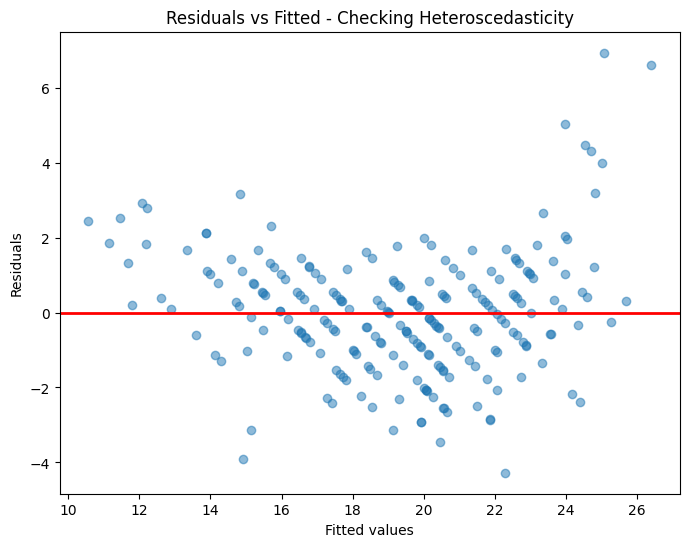

In [60]:
data2 = data1.drop(columns=['MPG_Hwy', 'Make'])  # prepare data
fit_all = smf.ols('MPG_City ~ Continent + Horsepower + Weight + Length + Width + Seating + Cylinders + Displacement + Transmission', data=data2).fit()  # fit full model

# Check for heteroscedasticity visually
plt.figure(figsize=(8, 6))  # create figure
plt.scatter(fit_all.fittedvalues, fit_all.resid, alpha=0.5)  # residual plot
plt.axhline(y=0, color='red', linewidth=2)  # reference line
plt.xlabel('Fitted values')  # x label
plt.ylabel('Residuals')  # y label
plt.title('Residuals vs Fitted - Checking Heteroscedasticity')  # title
plt.show()  # display

From the residual plot, one may worry about the violation of constant variance (heteroscedasticity).

To provide more trustworthy analysis, we may use sandwich standard errors for more accurate inferences:

In [64]:
# Calculate heteroscedasticity-consistent standard errors
from statsmodels.stats.sandwich_covariance import cov_hc1 # Not using directly, but keeping import
import numpy as np # Import numpy

# Manually calculate robust covariance matrix to avoid indexing error
# Based on statsmodels HC1 calculation: HC1 = (n / (n - p)) * (X' * diag(e_i^2) * X)^-1 * X' * diag(e_i^2) * X * (X' * diag(e_i^2) * X)^-1
# A simpler way is HC1 = (n / (n-p)) * (X' * Omega * X)^-1 where Omega is diag(e_i^2)
# Even simpler: HC1 = (n / (n - p)) * (X' * diag(e_i^2) * X)^-1 is incorrect.
# The correct form is approximately (X'X)^-1 * (X' diag(e_i^2) X) * (X'X)^-1 * (n / (n-p))
# Let's use the formula from statsmodels source for HC1: H = (n / (n-p)) * (X'X)^-1 * (X' diag(e_i^2) X) * (X'X)^-1
# where X is the design matrix, e is the residuals.

X = np.asarray(fit_all.model.exog) # Convert design matrix to numpy array
e = np.asarray(fit_all.resid) # Convert residuals to numpy array
n = fit_all.nobs
p = fit_all.df_model + 1 # number of parameters including intercept

# Calculate the middle part: X' * diag(e_i^2) * X
# diag(e_i^2) is a diagonal matrix with squared residuals. Multiplying by X' and X can be done efficiently.
# This is equivalent to summing X_i * X_i' * e_i^2 over observations i
# In matrix form: X.T @ (np.diag(e**2)) @ X - this is computationally expensive for large data
# A more efficient way: (e[:, None] * X).T @ (e[:, None] * X)
# Or even simpler: X.T @ (e**2)[:, None] * X - This is where the original error likely was.
# The correct matrix multiplication: X.T @ np.diag(e**2) @ X
# Let's use the efficient one: np.dot(X.T, (e[:,None]*X)) # This is not correct either based on source code
# Source code shows: H = np.dot(results.model.pinv_wexog, scale[:,None]*results.model.pinv_wexog.T)
# where scale is het_scale = results.nobs/(results.df_resid)*(results.resid**2) and results.model.pinv_wexog is the pseudo-inverse of the design matrix (X)

# Let's try the statsmodels source approach with numpy arrays
pinv_wexog = np.asarray(fit_all.model.pinv_wexog) # Pseudo-inverse of weighted exog (design matrix)
het_scale = (n / fit_all.df_resid) * (e**2) # Heteroskedasticity scale

# Calculate the robust covariance matrix components
# The error was likely in the line: scale[:,None]*results.model.pinv_wexog.T
# Let's perform this multiplication with numpy arrays
middle_matrix = (het_scale[:, None] * pinv_wexog.T) # het_scale as column vector times transpose of pinv_wexog

# Now perform the dot product as in statsmodels source
robust_cov = np.dot(pinv_wexog, middle_matrix)


robust_se = np.sqrt(np.diag(robust_cov))  # robust standard errors

# Calculate robust t-statistics
robust_t = fit_all.params / robust_se  # t-stats with robust SEs

# Calculate robust p-values
robust_p = 2 * (1 - stats.t.cdf(np.abs(robust_t), fit_all.df_resid))  # two-sided p-values

# Create comparison table
comparison = pd.DataFrame({  # create DataFrame
    'Coefficient': fit_all.params,  # estimates
    'Std Error': fit_all.bse,  # original SEs
    'Robust SE': robust_se,  # robust SEs
    'p-value': fit_all.pvalues,  # original p-values
    'Robust p-value': robust_p  # robust p-values
})
print(comparison)  # display comparison

                               Coefficient  Std Error  Robust SE  \
Intercept                        29.546292   3.787851   3.437009   
Continent[T.As]                   0.465359   0.291209   0.255222   
Continent[T.E]                    0.050087   0.427697   0.394285   
Transmission[T.cont_variable]     1.221632   0.995658   0.455263   
Transmission[T.manual]           -0.245463   0.555870   0.794193   
Horsepower                       -0.013306   0.003889   0.004505   
Weight                           -3.502804   0.389320   0.373823   
Length                            0.033133   0.014915   0.017035   
Width                            -0.012120   0.067415   0.056002   
Seating                           0.316481   0.142343   0.147939   
Cylinders                        -0.199797   0.205345   0.223190   
Displacement                     -0.167625   0.392656   0.384124   

                                    p-value  Robust p-value  
Intercept                      2.684358e-13    1.7763

The HC1 (Heteroscedasticity-Consistent) covariance estimator adjusts standard errors to be valid even when the constant variance assumption is violated. The `cov_hc1()` function implements the sandwich estimator. Robust standard errors tend to be more conservative (larger) when heteroscedasticity is present.

While the sandwich standard errors remain more or less the same as before, we do notice one difference: Asian cars are more efficient than that of American cars at $\alpha = 0.1$.

### 7.4 Appendix 4: Nonlinearity and Transformations

The $x$ variable may relate to $y$ through a function of $x$, say $log(x)$ or $x^2$.

We can handle this by transforming $x$.

First let's find out if there is some non-linear relationship by looking at pairwise scatter plots:

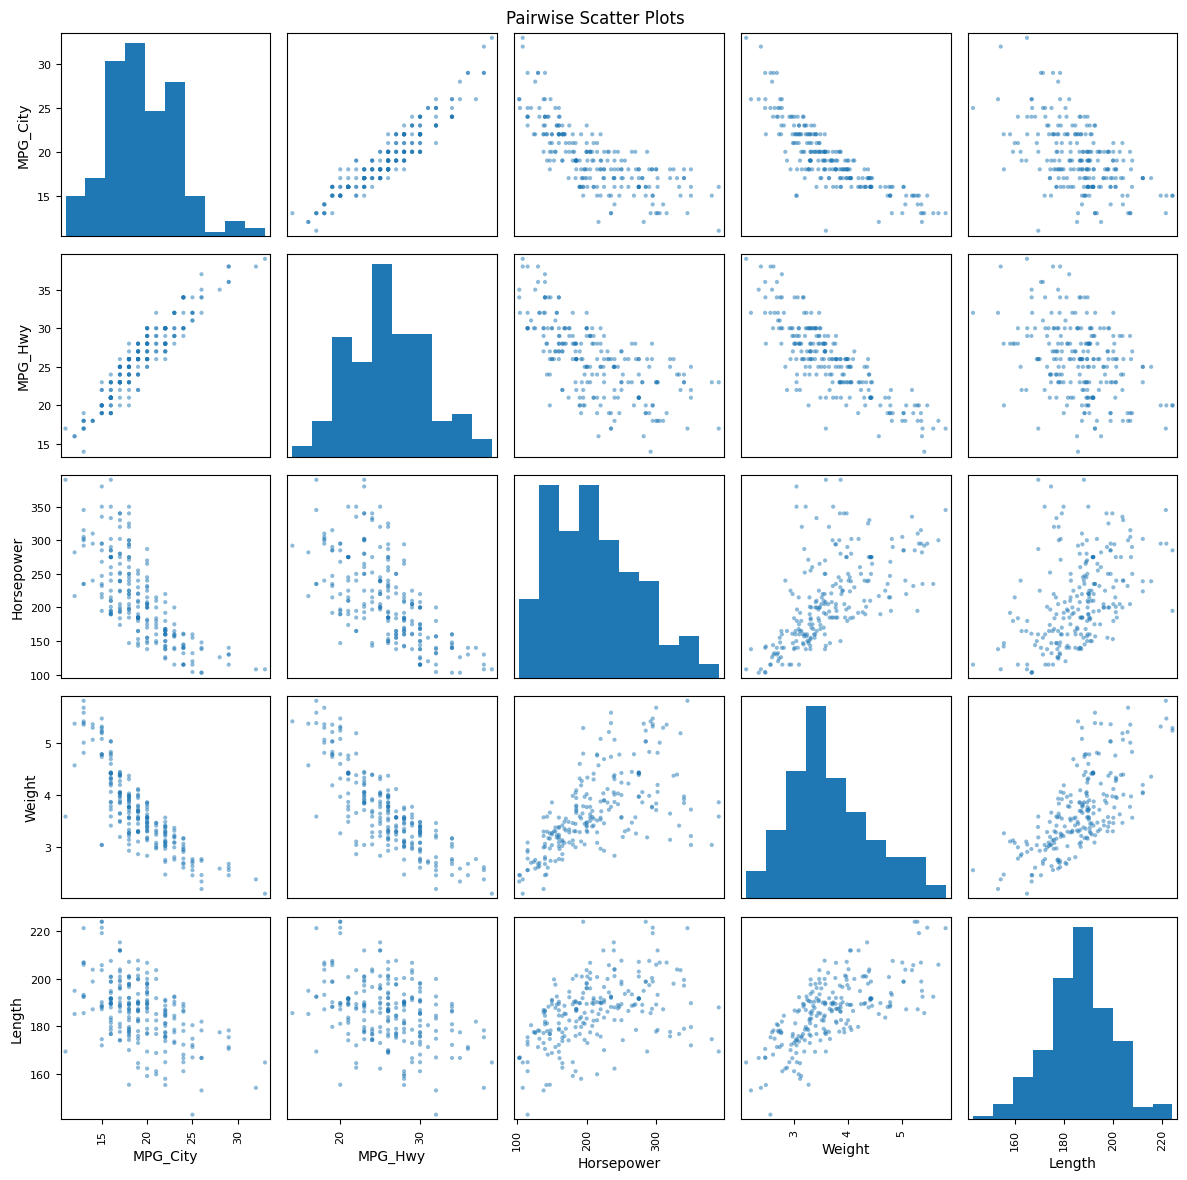

In [65]:
# Create pairwise scatter plot matrix
pd.plotting.scatter_matrix(data1.iloc[:, 2:7], figsize=(12, 12), alpha=0.5)  # scatter matrix for columns 2-6
plt.suptitle('Pairwise Scatter Plots')  # overall title
plt.tight_layout()  # adjust spacing
plt.show()  # display

The `scatter_matrix()` function creates a grid of scatter plots for all pairs of variables. This helps identify potential non-linear relationships. Based on the plots, Horsepower may need a transformation.

We look at Horsepower vs. 1/Horsepower:

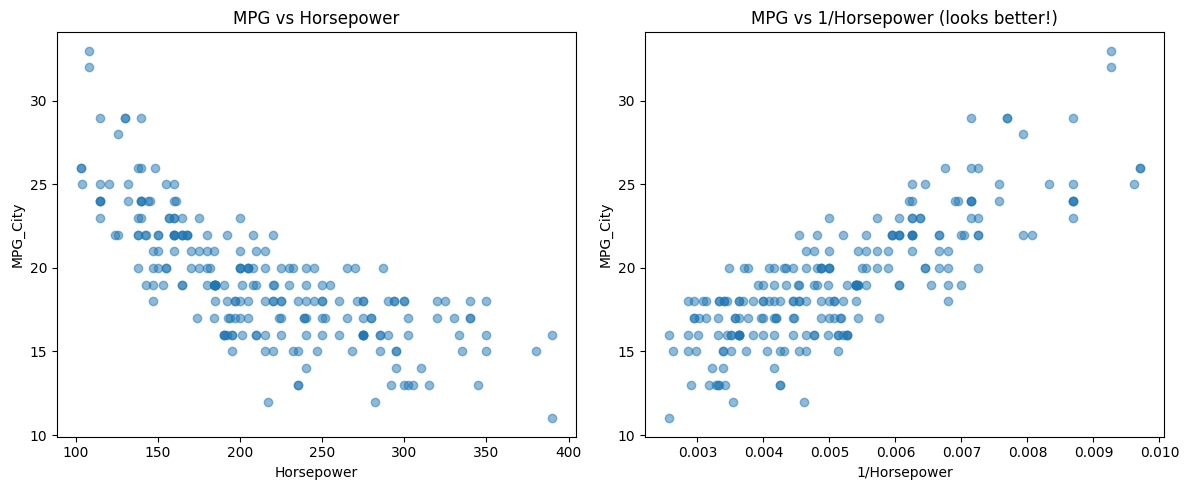

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # create subplots

# Original relationship
axes[0].scatter(data1['Horsepower'], data1['MPG_City'], alpha=0.5)  # scatter plot
axes[0].set_xlabel('Horsepower')  # x label
axes[0].set_ylabel('MPG_City')  # y label
axes[0].set_title('MPG vs Horsepower')  # title

# Transformed relationship
axes[1].scatter(1/data1['Horsepower'], data1['MPG_City'], alpha=0.5)  # reciprocal transformation
axes[1].set_xlabel('1/Horsepower')  # x label
axes[1].set_ylabel('MPG_City')  # y label
axes[1].set_title('MPG vs 1/Horsepower (looks better!)')  # title

plt.tight_layout()  # adjust spacing
plt.show()  # display

The reciprocal transformation `1/Horsepower` linearizes the relationship. This makes sense physically: fuel efficiency is inversely related to power.

1/Horsepower looks good, so we make a model using that:

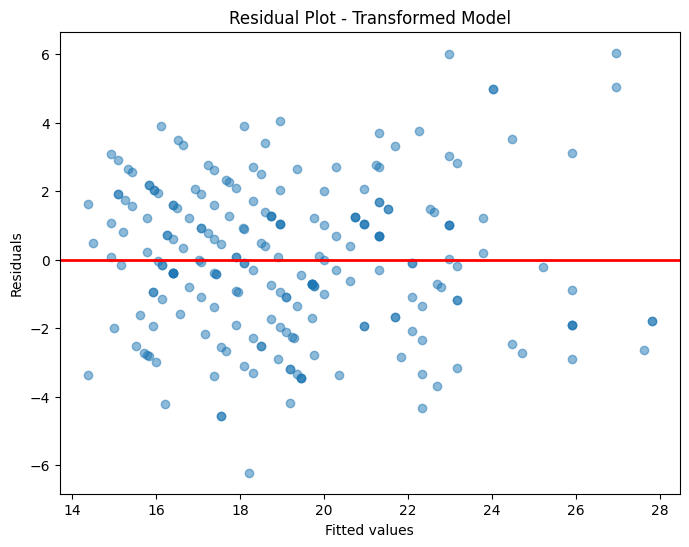

In [67]:
# Fit model with transformed variable
fit_transform = smf.ols('MPG_City ~ I(1/Horsepower)', data=data1).fit()  # I() protects arithmetic operations

# Check residual plot
plt.figure(figsize=(8, 6))  # create figure
plt.scatter(fit_transform.fittedvalues, fit_transform.resid, alpha=0.5)  # residuals
plt.axhline(y=0, color='red', linewidth=2)  # reference line
plt.xlabel('Fitted values')  # x label
plt.ylabel('Residuals')  # y label
plt.title('Residual Plot - Transformed Model')  # title
plt.show()  # display

The `I()` function in the formula protects arithmetic operations from being interpreted as formula operators. Without it, the division would be misinterpreted.

We also try to fit Horsepower²:

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     203.2
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           5.75e-51
Time:                        16:23:11   Log-Likelihood:                -498.50
No. Observations:                 226   AIC:                             1003.
Df Residuals:                     223   BIC:                             1013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             39.9410      1

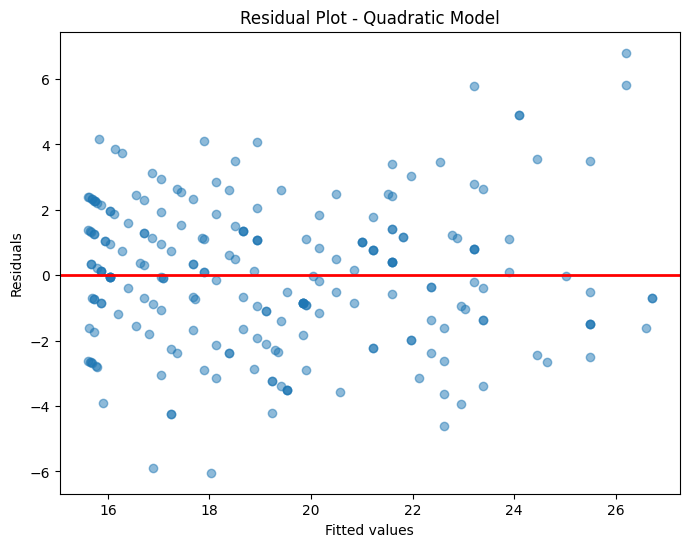

<Figure size 600x600 with 0 Axes>

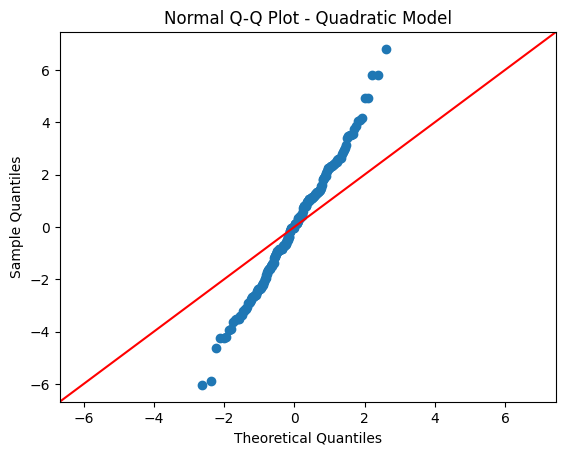

In [68]:
# Fit quadratic model
fit12 = smf.ols('MPG_City ~ Horsepower + I(Horsepower**2)', data=data1).fit()  # quadratic term
print(fit12.summary())  # display results

# Residual plot
plt.figure(figsize=(8, 6))  # create figure
plt.scatter(fit12.fittedvalues, fit12.resid, alpha=0.5)  # residuals
plt.axhline(y=0, color='red', linewidth=2)  # reference line
plt.xlabel('Fitted values')  # x label
plt.ylabel('Residuals')  # y label
plt.title('Residual Plot - Quadratic Model')  # title
plt.show()  # display

# QQ plot
fig = plt.figure(figsize=(6, 6))  # create figure
sm.qqplot(fit12.resid, line='45')  # QQ plot
plt.title('Normal Q-Q Plot - Quadratic Model')  # title
plt.show()  # display

The quadratic model includes both Horsepower and Horsepower² terms, allowing for a curved relationship. The `**2` operator squares the values.

### 7.5 Appendix 5: Model Diagnoses via a Perfect Linear Model

We look to fit a model containing 100 points of the equation

$y = 1 + 2x + \epsilon(0,2)$ i.e. $\beta_0 = 1, \beta_1 = 2, \sigma^2 = 2$

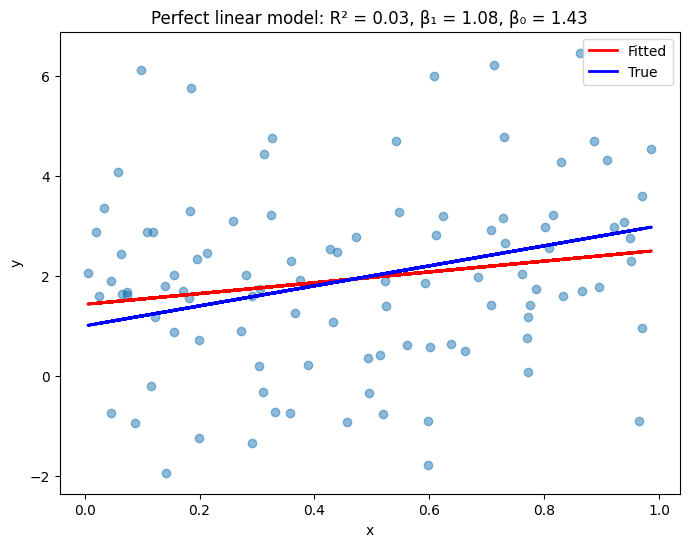

In [69]:
np.random.seed(42)  # set random seed for reproducibility
x = np.random.uniform(0, 1, 100)  # generate 100 uniform random numbers between 0 and 1
y = 1 + 2*x + np.random.normal(0, 2, 100)  # true model with normal errors

# Fit linear model
perfect_data = pd.DataFrame({'x': x, 'y': y})  # create DataFrame
fit_perfect = smf.ols('y ~ x', data=perfect_data).fit()  # fit model

# Extract results
rsquared = fit_perfect.rsquared  # R-squared value
beta_0 = fit_perfect.params['Intercept']  # intercept estimate
beta_1 = fit_perfect.params['x']  # slope estimate

# Plot
plt.figure(figsize=(8, 6))  # create figure
plt.scatter(x, y, alpha=0.5)  # data points
plt.plot(x, fit_perfect.predict(), 'r-', linewidth=2, label='Fitted')  # fitted line
plt.plot(x, 1 + 2*x, 'b-', linewidth=2, label='True')  # true line
plt.xlabel('x')  # x label
plt.ylabel('y')  # y label
plt.title(f'Perfect linear model: R² = {rsquared:.2f}, β₁ = {beta_1:.2f}, β₀ = {beta_0:.2f}')  # title
plt.legend()  # show legend
plt.show()  # display

The `np.random.seed()` function ensures reproducible random numbers. The `np.random.uniform()` generates uniformly distributed values. The `np.random.normal()` adds Gaussian noise with mean 0 and standard deviation 2.

Residual plot:

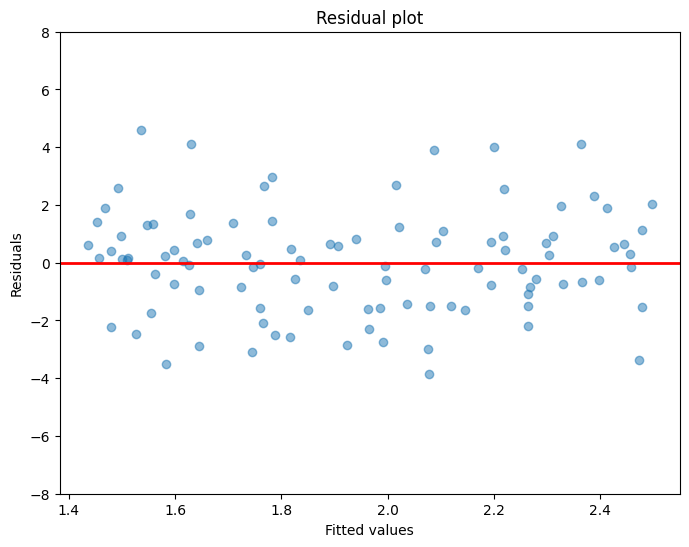

In [70]:
plt.figure(figsize=(8, 6))  # create figure
plt.scatter(fit_perfect.fittedvalues, fit_perfect.resid, alpha=0.5)  # residuals
plt.axhline(y=0, color='red', linewidth=2)  # reference line
plt.ylim(-8, 8)  # set y-axis limits
plt.xlabel('Fitted values')  # x label
plt.ylabel('Residuals')  # y label
plt.title('Residual plot')  # title
plt.show()  # display

For a well-specified model, residuals should scatter randomly around zero with no patterns.

Check normality:

<Figure size 600x600 with 0 Axes>

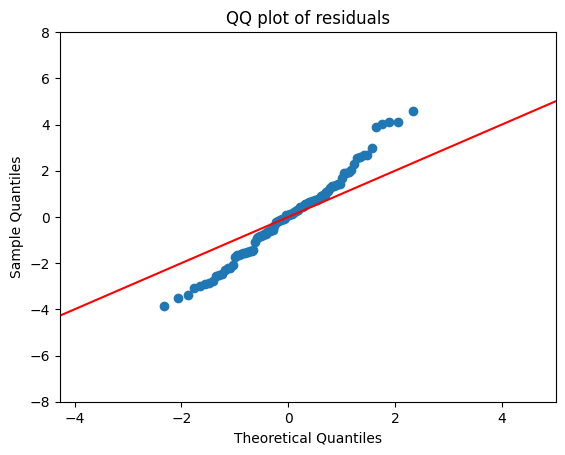

In [71]:
fig = plt.figure(figsize=(6, 6))  # create figure
sm.qqplot(fit_perfect.resid, line='45')  # QQ plot
plt.ylim(-8, 8)  # set y limits
plt.title('QQ plot of residuals')  # title
plt.show()  # display

Points following the 45-degree line indicate normally distributed residuals, confirming our model assumptions.

The following example tells us we can't look at y directly to check the normality assumption. We really need to examine residuals!

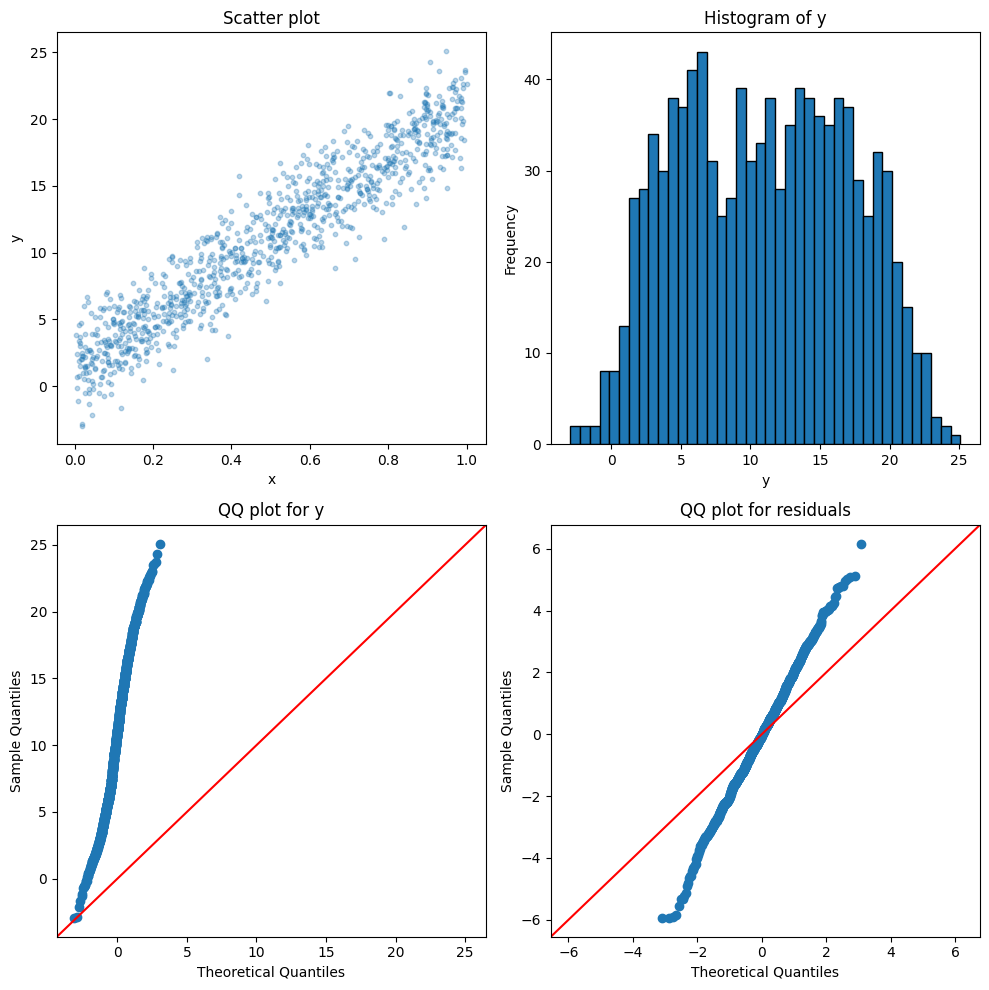

        mean   std_dev
0  11.002923  6.079133


In [72]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 subplot grid

np.random.seed(42)  # reproducibility
x = np.random.uniform(0, 1, 1000)  # 1000 uniform values
y = 1 + 20*x + np.random.normal(0, 2, 1000)  # strong linear relationship

# Scatter plot
axes[0, 0].scatter(x, y, alpha=0.3, s=10)  # small points with transparency
axes[0, 0].set_xlabel('x')  # x label
axes[0, 0].set_ylabel('y')  # y label
axes[0, 0].set_title('Scatter plot')  # title

# Histogram of y
axes[0, 1].hist(y, bins=40, edgecolor='black')  # histogram with 40 bins
axes[0, 1].set_xlabel('y')  # x label
axes[0, 1].set_ylabel('Frequency')  # y label
axes[0, 1].set_title('Histogram of y')  # title

# QQ plot of y
sm.qqplot(y, line='45', ax=axes[1, 0])  # QQ plot of y values
axes[1, 0].set_title('QQ plot for y')  # title

# QQ plot of residuals
fit_demo = smf.ols('y ~ x', data=pd.DataFrame({'x': x, 'y': y})).fit()  # fit model
sm.qqplot(fit_demo.resid, line='45', ax=axes[1, 1])  # QQ plot of residuals
axes[1, 1].set_title('QQ plot for residuals')  # title

plt.tight_layout()  # adjust spacing
plt.show()  # display

# Summary statistics
print(pd.DataFrame({'mean': [y.mean()], 'std_dev': [y.std()]}))  # mean and SD of y

This example shows why we must check residuals, not the raw y values, for normality. The y values appear skewed because they include the linear trend, but the residuals (after removing the trend) are normally distributed.

### 7.6 Appendix 5: Collinearity

When some $x$'s are highly correlated we cannot separate the effect. But it is still fine for the purpose of prediction.

A simulation to illustrate some consequences of collinearity. Each p-value for $x_1$ and $x_2$ is large but the null of both $\beta$'s = 0 are rejected... Because $x_1$ and $x_2$ are highly correlated.

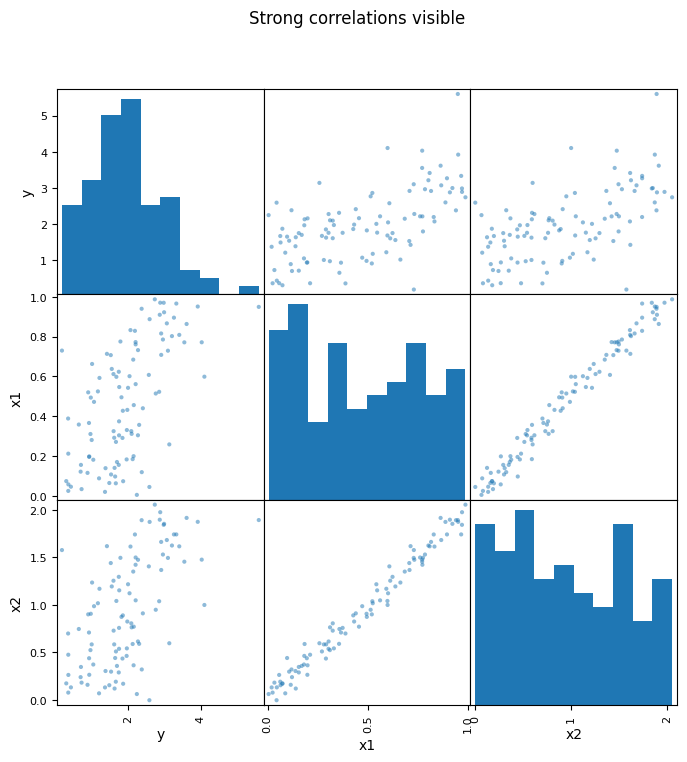

In [73]:
np.random.seed(42)  # reproducibility
x1 = np.random.uniform(0, 1, 100)  # first predictor
x2 = 2*x1 + np.random.normal(0, 0.1, 100)  # second predictor highly correlated with x1
y = 1 + 2*x1 + np.random.normal(0, 0.7, 100)  # true model depends only on x1

# Create DataFrame
collinear_data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})  # combine into DataFrame

# Pairwise scatter plots
pd.plotting.scatter_matrix(collinear_data, figsize=(8, 8), alpha=0.5)  # scatter matrix
plt.suptitle('Strong correlations visible')  # title
plt.show()  # display

The scatter matrix shows strong correlation between x1 and x2, which will cause collinearity issues.

$x_1$ is a useful predictor:

In [74]:
fit_x1 = smf.ols('y ~ x1', data=collinear_data).fit()  # model with x1 only
print(fit_x1.summary())  # display results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     59.20
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.13e-11
Time:                        16:26:53   Log-Likelihood:                -115.01
No. Observations:                 100   AIC:                             234.0
Df Residuals:                      98   BIC:                             239.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0226      0.145      7.056      0.0

When x1 is alone in the model, it shows as highly significant with a small p-value.

$x_2$ is a useful predictor:

In [75]:
fit_x2 = smf.ols('y ~ x2', data=collinear_data).fit()  # model with x2 only
print(fit_x2.summary())  # display results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           2.96e-11
Time:                        16:28:06   Log-Likelihood:                -115.98
No. Observations:                 100   AIC:                             236.0
Df Residuals:                      98   BIC:                             241.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0274      0.148      6.965      0.0

Similarly, x2 alone appears highly significant because it's correlated with x1, which is the true predictor.

$x_1$ and $x_2$ together show that neither is significant:

In [76]:
fit_both = smf.ols('y ~ x1 + x2', data=collinear_data).fit()  # model with both predictors
print(fit_both.summary())  # display results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     29.34
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.09e-10
Time:                        16:28:29   Log-Likelihood:                -114.99
No. Observations:                 100   AIC:                             236.0
Df Residuals:                      97   BIC:                             243.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0266      0.147      6.993      0.0

When both correlated predictors are included, neither appears significant individually, even though together they explain the variation in y. This is the collinearity problem - we can't separate their individual effects.

Check the correlation:

In [77]:
correlation = collinear_data[['x1', 'x2']].corr()  # correlation matrix
print("Correlation between x1 and x2:")  # label
print(correlation)  # display correlation

Correlation between x1 and x2:
          x1        x2
x1  1.000000  0.988158
x2  0.988158  1.000000


The correlation is very high (close to 1), confirming the collinearity issue. When predictors are highly correlated, we can't reliably estimate their individual effects, though the model may still predict well.

### 7.7 Appendix 6: F-distribution

A quick look at an F distribution. One may change df1=4 and df2=221 to see the changes in the distribution.

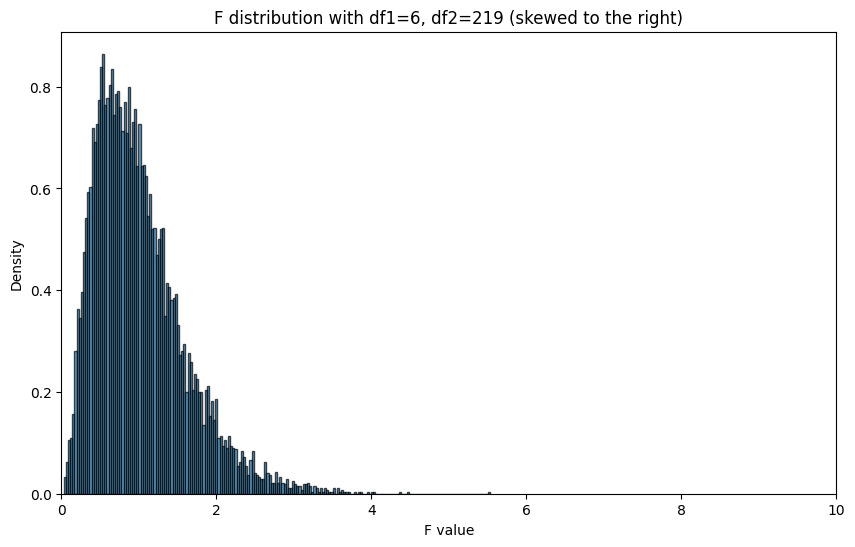

      F_stat       p_value  Cutoff_0.05
0  87.221967  1.110223e-16     2.140145


In [78]:
# Generate and plot F distribution
f_samples = np.random.f(6, 226-7, 10000)  # generate 10000 samples from F(6, 219)
plt.figure(figsize=(10, 6))  # create figure
plt.hist(f_samples, bins=200, density=True, alpha=0.7, edgecolor='black')  # histogram
plt.xlim(0, 10)  # limit x-axis for better visualization
plt.xlabel('F value')  # x label
plt.ylabel('Density')  # y label
plt.title('F distribution with df1=6, df2=219 (skewed to the right)')  # title
plt.show()  # display

# Extract F-statistic from model and calculate p-value
f_stat = fit3.fvalue  # F-statistic from model
df1 = len(fit3.params) - 1  # numerator degrees of freedom (predictors)
df2 = fit3.df_resid  # denominator degrees of freedom (residual)
p_value = 1 - stats.f.cdf(f_stat, df1, df2)  # upper tail probability

# Critical value
cutoff = stats.f.ppf(0.95, df1, df2)  # 95th percentile of F distribution

print(pd.DataFrame({  # display results
    'F_stat': [f_stat],
    'p_value': [p_value],
    'Cutoff_0.05': [cutoff]
}))

The F distribution is right-skewed and used for testing multiple coefficients simultaneously. The `np.random.f()` generates F-distributed random values. The `stats.f.cdf()` gives cumulative probabilities, and `stats.f.ppf()` gives percentiles. If the F-statistic exceeds the critical value, we reject the null hypothesis at the 0.05 significance level.